CALCULATE VALUE BASED CUSTOMERS (CUSTOMER VALUE)

In [359]:
!pip install imbalanced-learn

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
!pip install holidays
import holidays

In [361]:
df = pd.read_csv('resp_data.csv')

In [362]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [6]:
# Target: Is the column in the dataset that you are trying to predict

# features: are the columns that you are using to predict the target

In [363]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [364]:
print(df.shape)
print(train.shape)
print(test.shape)

(2240, 22)
(1792, 22)
(448, 22)


In [365]:
train.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1528,2115,1957,Graduation,Together,50116.0,1,1,6/20/2014,68,54,0,10,0,0,2,2,1,0,4,5,0,0
1269,7723,1979,Graduation,Together,75507.0,0,0,2/5/2014,56,709,93,374,104,80,80,1,8,6,6,3,0,0
1816,5959,1968,Graduation,Single,35893.0,1,1,10/15/2012,80,158,0,23,0,0,18,6,3,1,5,8,0,0
278,9860,1959,Graduation,Together,44911.0,0,1,3/15/2013,11,159,0,22,2,1,31,3,4,1,4,7,0,0
119,850,1968,Graduation,Single,70566.0,0,1,6/10/2013,4,381,28,215,84,28,21,2,6,5,9,3,0,0


In [366]:
#A1 
train.reset_index(drop=True,inplace=True)

In [367]:
#A2
train.drop(columns=['Id'], inplace=True)

In [368]:
#checking for missing values
train.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 18
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [369]:
#A3 drop missing values
train.dropna(inplace=True)

In [370]:
train.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [371]:
#checking data types
train.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [372]:
#A4
# converting columns to datetime data type
train['Dt_Customer'] = pd.to_datetime(train['Dt_Customer'])
train['Recency'] = pd.to_datetime(train['Recency'])

In [373]:
train.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                datetime64[ns]
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

In [374]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0,0
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0,0
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0,0
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0,0
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0,0


In [375]:
#check for duplicated variables
train.duplicated().sum()

125

In [376]:
#A5
#drop duplicated variables
train.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [377]:
train.duplicated().sum()

0

In [378]:
#A6
# Split data into features and targets
target = 'Response'

X_train = train.drop(target,axis=1)
y_train = train[target]

In [379]:
X_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0


Feature Engineering

In [380]:
#Calculate Total Spending per Customer
#A7
X_train['TotalSpending'] = X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
X_train['TotalSpending'].head(5)

0      66
1    1440
2     199
3     215
4     757
Name: TotalSpending, dtype: int64

In [381]:
#Count The Number Of Purchases Per Customer 
#A8
X_train['NumPurchases'] = X_train[['NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
X_train['NumPurchases'].head(5)

0     7
1    21
2    15
3    12
4    22
Name: NumPurchases, dtype: int64

In [382]:
#Calculate Average Purchase Value (APV)
#A9
X_train['Average Purchase Value'] = X_train['TotalSpending'] / X_train['NumPurchases']
X_train['Average Purchase Value'].head(5)

0     9.428571
1    68.571429
2    13.266667
3    17.916667
4    34.409091
Name: Average Purchase Value, dtype: float64

In [383]:
#A10
days_since_customer = (pd.to_datetime('12/31/2014') -
pd.to_datetime(X_train['Dt_Customer'])).dt.days
days_since_customer.head(5)

0    194
1    329
2    807
3    656
4    569
Name: Dt_Customer, dtype: int64

In [384]:
#Calculate Average Purchase Frequency (APF)
#A11
X_train['Average Purchase Frequency'] = X_train['NumPurchases'] / days_since_customer
X_train['Average Purchase Frequency'].head(5)

0    0.036082
1    0.063830
2    0.018587
3    0.018293
4    0.038664
Name: Average Purchase Frequency, dtype: float64

In [385]:
#Calculate Customer Value (CV)
#A12
X_train['Customer Value'] = X_train['Average Purchase Value'] * X_train['Average Purchase Frequency']
X_train['Customer Value'].head(5)

0    0.340206
1    4.376900
2    0.246592
3    0.327744
4    1.330404
Name: Customer Value, dtype: float64

In [386]:
X_train.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0,66,7,9.428571,0.036082,0.340206
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0,1440,21,68.571429,0.063830,4.376900
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0,199,15,13.266667,0.018587,0.246592
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0,215,12,17.916667,0.018293,0.327744
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0,757,22,34.409091,0.038664,1.330404


In [387]:
X_train.dtypes

Year_Birth                             int64
Education                             object
Marital_Status                        object
Income                               float64
Kidhome                                int64
Teenhome                               int64
Dt_Customer                   datetime64[ns]
Recency                       datetime64[ns]
MntWines                               int64
MntFruits                              int64
MntMeatProducts                        int64
MntFishProducts                        int64
MntSweetProducts                       int64
MntGoldProds                           int64
NumDealsPurchases                      int64
NumWebPurchases                        int64
NumCatalogPurchases                    int64
NumStorePurchases                      int64
NumWebVisitsMonth                      int64
Complain                               int64
TotalSpending                          int64
NumPurchases                           int64
Average Pu

In [388]:
#A13
#creating columns for day of week, month, year, season, weekday, weekend

X_train['Day_of_Week'] = X_train['Dt_Customer'].dt.dayofweek
X_train['Month'] = X_train['Dt_Customer'].dt.month
X_train['Year'] = X_train['Dt_Customer'].dt.year
X_train['Season'] = (X_train['Month'] % 12 + 3) // 3
X_train['Weekday'] = (X_train['Day_of_Week'] < 5).astype(int)
X_train['Weekend'] = (X_train['Day_of_Week'] >= 5).astype(int)

# Assuming X_train['Day_of_Week'] contains numerical representations of days (0 for Monday, 1 for Tuesday, etc.)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
X_train['Day_of_Week'] = X_train['Dt_Customer'].dt.dayofweek.map(day_names)

# Assuming X_train['Month'] contains numerical representations of months (1 for January, 2 for February, etc.)
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
X_train['Month'] = X_train['Dt_Customer'].dt.month.map(month_names)


In [389]:
#A14
# Initialize UK holidays
uk_holidays = holidays.UK()

# Apply the lambda function to check if each date in 'Dt_Customer' falls on a UK holiday
X_train['holiday'] = X_train['Dt_Customer'].apply(lambda x: int(x in uk_holidays))

In [390]:
X_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0,66,7,9.428571,0.036082,0.340206,Friday,June,2014,3,1,0,0
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0,1440,21,68.571429,0.063830,4.376900,Wednesday,February,2014,1,1,0,0
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0,199,15,13.266667,0.018587,0.246592,Monday,October,2012,4,1,0,0
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0,215,12,17.916667,0.018293,0.327744,Friday,March,2013,2,1,0,0
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0,757,22,34.409091,0.038664,1.330404,Monday,June,2013,3,1,0,0


In [391]:
#A15
#create age column

import datetime

# Assuming 'Year_Birth' contains the birth year of individuals
current_year = datetime.datetime.now().year
X_train['Age'] = current_year - X_train['Year_Birth']


In [392]:
#A16
#create column for family size
X_train['Family_Size'] = X_train['Kidhome'] + X_train['Teenhome'] + 1

In [393]:
X_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday,Age,Family_Size
0,1957,Graduation,Together,50116.0,1,1,2014-06-20,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0,66,7,9.428571,0.036082,0.340206,Friday,June,2014,3,1,0,0,67,3
1,1979,Graduation,Together,75507.0,0,0,2014-02-05,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0,1440,21,68.571429,0.063830,4.376900,Wednesday,February,2014,1,1,0,0,45,1
2,1968,Graduation,Single,35893.0,1,1,2012-10-15,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0,199,15,13.266667,0.018587,0.246592,Monday,October,2012,4,1,0,0,56,3
3,1959,Graduation,Together,44911.0,0,1,2013-03-15,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0,215,12,17.916667,0.018293,0.327744,Friday,March,2013,2,1,0,0,65,2
4,1968,Graduation,Single,70566.0,0,1,2013-06-10,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0,757,22,34.409091,0.038664,1.330404,Monday,June,2013,3,1,0,0,56,2


In [394]:
#A17
#Drop columns
X_train = X_train.drop(columns=['Dt_Customer'])
X_train = X_train.drop(columns=['Year_Birth'])
X_train = X_train.drop(columns=['Kidhome'])
X_train = X_train.drop(columns=['Teenhome'])

In [395]:
X_train.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday,Age,Family_Size
0,Graduation,Together,50116.0,1970-01-01 00:00:00.000000068,54,0,10,0,0,2,2,1,0,4,5,0,66,7,9.428571,0.036082,0.340206,Friday,June,2014,3,1,0,0,67,3
1,Graduation,Together,75507.0,1970-01-01 00:00:00.000000056,709,93,374,104,80,80,1,8,6,6,3,0,1440,21,68.571429,0.063830,4.376900,Wednesday,February,2014,1,1,0,0,45,1
2,Graduation,Single,35893.0,1970-01-01 00:00:00.000000080,158,0,23,0,0,18,6,3,1,5,8,0,199,15,13.266667,0.018587,0.246592,Monday,October,2012,4,1,0,0,56,3
3,Graduation,Together,44911.0,1970-01-01 00:00:00.000000011,159,0,22,2,1,31,3,4,1,4,7,0,215,12,17.916667,0.018293,0.327744,Friday,March,2013,2,1,0,0,65,2
4,Graduation,Single,70566.0,1970-01-01 00:00:00.000000004,381,28,215,84,28,21,2,6,5,9,3,0,757,22,34.409091,0.038664,1.330404,Monday,June,2013,3,1,0,0,56,2


In [396]:
cat_feat = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat_feat.append(i)

In [397]:
print(cat_feat)

['Education', 'Marital_Status', 'Day_of_Week', 'Month']


In [398]:
for i in cat_feat:
    if X_train[i].dtype == 'O':
        print(f"{i} has {X_train[i].nunique()} classes\nThey are:\n{X_train[i].unique()}\n") 

Education has 5 classes
They are:
['Graduation' 'PhD' '2n Cycle' 'Basic' 'Master']

Marital_Status has 7 classes
They are:
['Together' 'Single' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd']

Day_of_Week has 7 classes
They are:
['Friday' 'Wednesday' 'Monday' 'Thursday' 'Saturday' 'Tuesday' 'Sunday']

Month has 12 classes
They are:
['June' 'February' 'October' 'March' 'December' 'August' 'July' 'May'
 'January' 'April' 'November' 'September']



In [399]:
num_feat = []
for i in X_train.columns:
    if X_train[i].dtype == 'int64' or X_train[i].dtype == 'float64':
        num_feat.append(i)

In [400]:
num_feat

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'TotalSpending',
 'NumPurchases',
 'Average Purchase Value',
 'Average Purchase Frequency',
 'Customer Value',
 'holiday',
 'Age',
 'Family_Size']

In [401]:
X_train[num_feat]

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,holiday,Age,Family_Size
0,50116.0,54,0,10,0,0,2,2,1,0,4,5,0,66,7,9.428571,0.036082,0.340206,0,67,3
1,75507.0,709,93,374,104,80,80,1,8,6,6,3,0,1440,21,68.571429,0.063830,4.376900,0,45,1
2,35893.0,158,0,23,0,0,18,6,3,1,5,8,0,199,15,13.266667,0.018587,0.246592,0,56,3
3,44911.0,159,0,22,2,1,31,3,4,1,4,7,0,215,12,17.916667,0.018293,0.327744,0,65,2
4,70566.0,381,28,215,84,28,21,2,6,5,9,3,0,757,22,34.409091,0.038664,1.330404,0,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,34738.0,3,2,10,3,0,2,1,1,0,3,6,0,20,5,4.000000,0.089286,0.357143,0,40,2
1645,68655.0,456,19,832,75,118,38,1,4,5,11,3,0,1538,21,73.238095,0.025799,1.889435,0,36,1
1646,60230.0,520,20,367,39,81,40,2,6,3,6,5,0,1067,17,62.764706,0.028814,1.808475,0,68,2
1647,69142.0,448,4,34,6,4,39,3,8,1,7,5,0,535,19,28.157895,0.102703,2.891892,0,72,2


In [402]:
#A18
# Define a threshold for clipping (you can adjust this value based on your data)
threshold = 10000

# Clip the numerical features
X_train[num_feat] = np.clip(X_train[num_feat], None, threshold)

In [403]:
#A19
scaler = MinMaxScaler()
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])

In [404]:
X_train.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday,Age,Family_Size
0,Graduation,Together,1.0,1970-01-01 00:00:00.000000068,0.036169,0.000000,0.005797,0.000000,0.000000,0.006231,0.133333,0.037037,0.000000,0.307692,0.25,0.0,0.024206,0.159091,0.000890,0.041856,0.004051,Friday,June,2014,3,1,0,0.0,0.378641,0.666667
1,Graduation,Together,1.0,1970-01-01 00:00:00.000000056,0.474883,0.467337,0.216812,0.401544,0.305344,0.249221,0.066667,0.296296,0.214286,0.461538,0.15,0.0,0.569444,0.477273,0.006804,0.074043,0.053894,Wednesday,February,2014,1,1,0,0.0,0.165049,0.000000
2,Graduation,Single,1.0,1970-01-01 00:00:00.000000080,0.105827,0.000000,0.013333,0.000000,0.000000,0.056075,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0.076984,0.340909,0.001273,0.021561,0.002895,Monday,October,2012,4,1,0,0.0,0.271845,0.666667
3,Graduation,Together,1.0,1970-01-01 00:00:00.000000011,0.106497,0.000000,0.012754,0.007722,0.003817,0.096573,0.200000,0.148148,0.035714,0.307692,0.35,0.0,0.083333,0.272727,0.001738,0.021220,0.003897,Friday,March,2013,2,1,0,0.0,0.359223,0.333333
4,Graduation,Single,1.0,1970-01-01 00:00:00.000000004,0.255191,0.140704,0.124638,0.324324,0.106870,0.065421,0.133333,0.222222,0.178571,0.692308,0.15,0.0,0.298413,0.500000,0.003388,0.044851,0.016278,Monday,June,2013,3,1,0,0.0,0.271845,0.333333


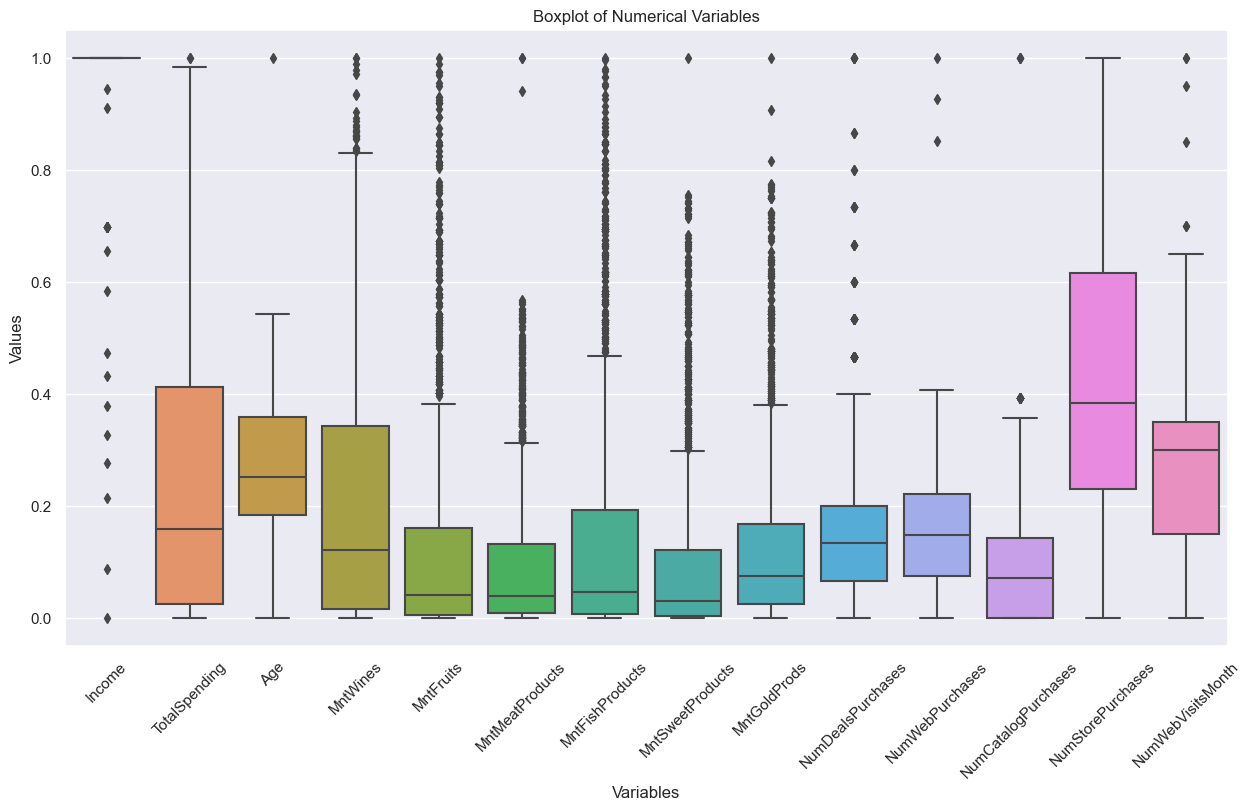

In [405]:
#checking for outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_columns = ['Income', 'TotalSpending', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Create boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


In [406]:
#A20
#deal with outliers by transformation

# List of columns to transform
columns_to_transform = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Apply log1p transformation to each column in the list
X_train[columns_to_transform] = X_train[columns_to_transform].apply(np.log1p)

In [407]:
X_train.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday,Age,Family_Size
0,Graduation,Together,1.0,1970-01-01 00:00:00.000000068,0.036169,0.000000,0.005780,0.000000,0.000000,0.006211,0.133333,0.037037,0.000000,0.307692,0.25,0.0,0.024206,0.159091,0.000890,0.041856,0.004051,Friday,June,2014,3,1,0,0.0,0.378641,0.666667
1,Graduation,Together,1.0,1970-01-01 00:00:00.000000056,0.474883,0.383449,0.196234,0.337575,0.266466,0.222520,0.066667,0.296296,0.214286,0.461538,0.15,0.0,0.569444,0.477273,0.006804,0.074043,0.053894,Wednesday,February,2014,1,1,0,0.0,0.165049,0.000000
2,Graduation,Single,1.0,1970-01-01 00:00:00.000000080,0.105827,0.000000,0.013245,0.000000,0.000000,0.054559,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0.076984,0.340909,0.001273,0.021561,0.002895,Monday,October,2012,4,1,0,0.0,0.271845,0.666667
3,Graduation,Together,1.0,1970-01-01 00:00:00.000000011,0.106497,0.000000,0.012673,0.007692,0.003810,0.092190,0.200000,0.148148,0.035714,0.307692,0.35,0.0,0.083333,0.272727,0.001738,0.021220,0.003897,Friday,March,2013,2,1,0,0.0,0.359223,0.333333
4,Graduation,Single,1.0,1970-01-01 00:00:00.000000004,0.255191,0.131645,0.117461,0.280902,0.101536,0.063370,0.133333,0.222222,0.178571,0.692308,0.15,0.0,0.298413,0.500000,0.003388,0.044851,0.016278,Monday,June,2013,3,1,0,0.0,0.271845,0.333333


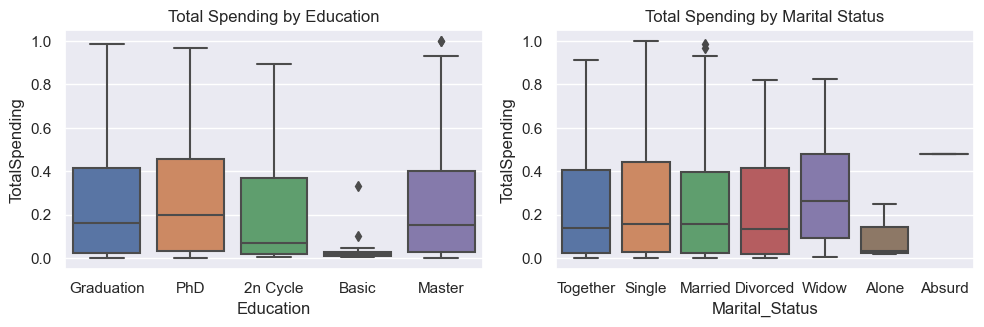

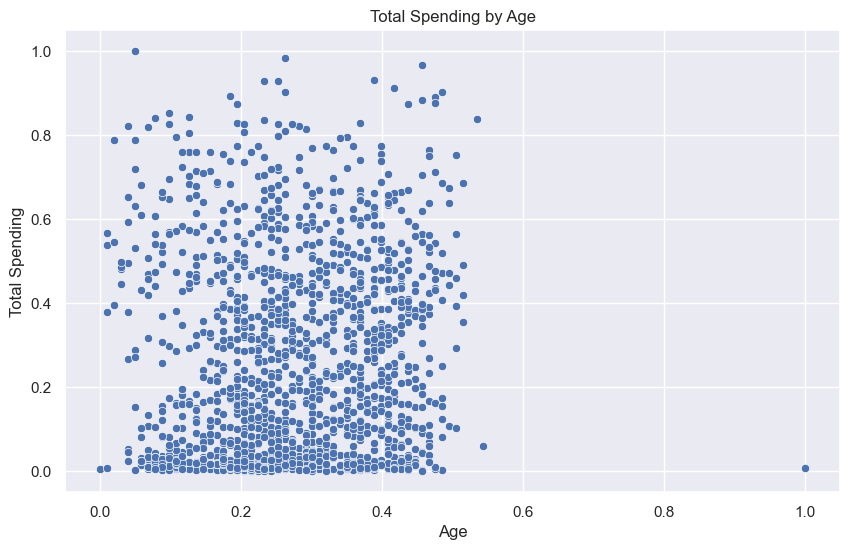

In [408]:
# 1
# Descriptive analysis and visualizations
#How does the total spending vary across different customer segments or demographics?
# Visualizations
plt.figure(figsize=(10, 6))

# Total Spending by Education
plt.subplot(2, 2, 1)
sns.boxplot(x='Education', y='TotalSpending', data=X_train)
plt.title('Total Spending by Education')

# Total Spending by Marital Status
plt.subplot(2, 2, 2)
sns.boxplot(x='Marital_Status', y='TotalSpending', data=X_train)
plt.title('Total Spending by Marital Status')

plt.tight_layout()
plt.show()

# Additional visualization for Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalSpending', data=X_train)
plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()

Implications and Impact
Based on the visualizations and descriptive statistics:

Education:
The visualisations implies that the customers with high level educations such as Masters, PhD, Gaduation tend to spend more than those with lower lever education. Since PhD holders spend the most, it will be benefit to the business for promotional offers and loyalty programs to be tailored to this group. However, the Masters and Graduates total spending are also high it might be helpful for the business to create promotional offers and loyalty programs towards them as well. 

Marital Status:
Understanding spending patterns based on marital status can help in personalizing offers. For example, "Together" customers may respond better to family-oriented promotions, while "Single" customers might prefer individual-centric offers. The plot shows that Singles, Widows and Divorced customers tend to spend more than others. It would be ideal to focus on individual-centric offers than family and married. 

Age:
Observation: Spending tends to vary with the age of the customer.
Implication: Age-specific marketing campaigns and product recommendations could improve customer satisfaction and sales.
Overall, understanding these demographic influences on total spending can help businesses tailor their marketing strategies, improve customer targeting, and ultimately drive higher sales and customer satisfaction.

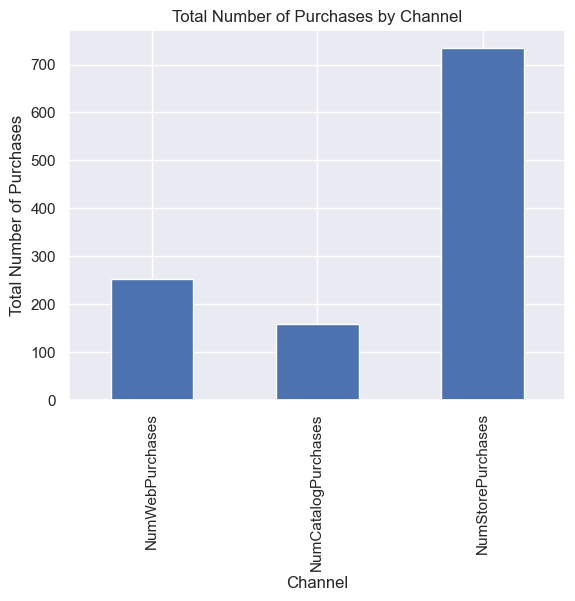

In [409]:
# 2. Contribution of channels (web, catalog, store) to total number of purchases
purchase_channels = X_train[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
purchase_channels.sum().plot(kind='bar')
plt.title('Total Number of Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Number of Purchases')
plt.show()

Understanding Channel Effectiveness:
This imply that customers tend to purchase items more in the store than on the web and catalogues. It is advised that the business channel it's advertising techniques focusing more on store purchase than web and catalogue. 

Strategic Allocation of Resources:
Businesses can use this information to allocate resources effectively across channels.
Channels with higher purchase volumes might benefit from additional investment in infrastructure, marketing, and customer support to further enhance performance. It seems that store channel need additional invstment in infrastructure, marketing and customer support to further enhance performance. 

On flip side, the catalogue and Web channels which have low purchase volumes need to address by creating different strategies, such as promotions or improvements, to boost customer engagement. 

Marketing and Promotion Strategies:
Understanding which channels customers prefer can help businesses tailor their marketing and promotional efforts. Due to the high volume of store purchases, the business will benefit if there is increased personal campaingns to individuals to maintain the high store purchases, while the low volume of web and catalo purchases, it will be more appropriate if the the business increased it's digital marketing efforts and direct mail campaingns. 

Customer Experience Enhancement:
Insights into channel preferences can guide efforts to improve customer experience across different touchpoints.
Businesses can focus on optimizing the user experience on the web platform, enhancing the catalog shopping process, or improving the in-store purchasing experience based on the data.

Sales Strategy Development:
The data can inform sales strategies by highlighting which channels are driving the most sales. Companies can develop channel-specific sales tactics to maximize revenue and customer satisfaction.

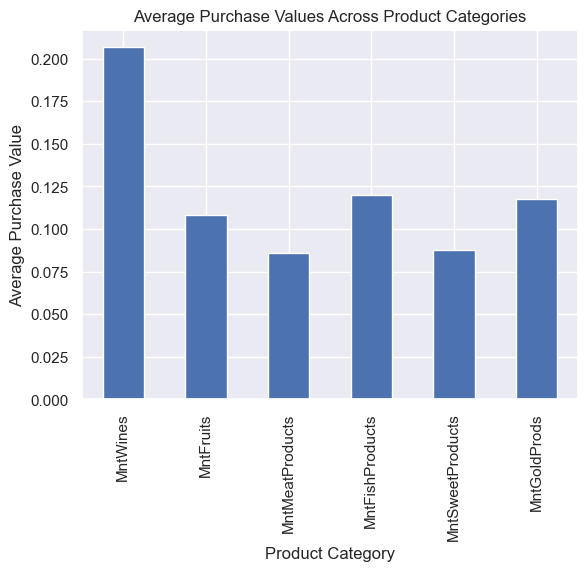

In [410]:
# 3. Average purchase values across product categories
avg_purchase_values = X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
avg_purchase_values.plot(kind='bar')
plt.title('Average Purchase Values Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Value')
plt.show()

Implications of the Plot
Identify Popular Product Categories:
This implies that customers spend more on wines compared to other catergories.

Resource Allocation and Marketing:
From the visualisation, it seems wine caterory will need targeting marketing campaigns to boost sales further while other catergories such as Gold, fish, meat, fruits, sweet will need promotional efforts or pricing adjustments to iuncrease their attractiveness. 

Inventory Management:
The business need to ensure that wine product is well-stocked to meet demand while other products such as Gold, fish, meat, fruits and sweet need a different inventory strategies or product adjustments. 

Customer Insights:
It shows that customers spend more on wine than other products. There might be need to improve other products through development and customisation to ensure that it aligns with customers interest. It might be useful to do a customer survey to be able to identify the needs of the customers interest in the other products such as Gold, fish, meat, fruits, sweet. 

c:\Users\toyin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


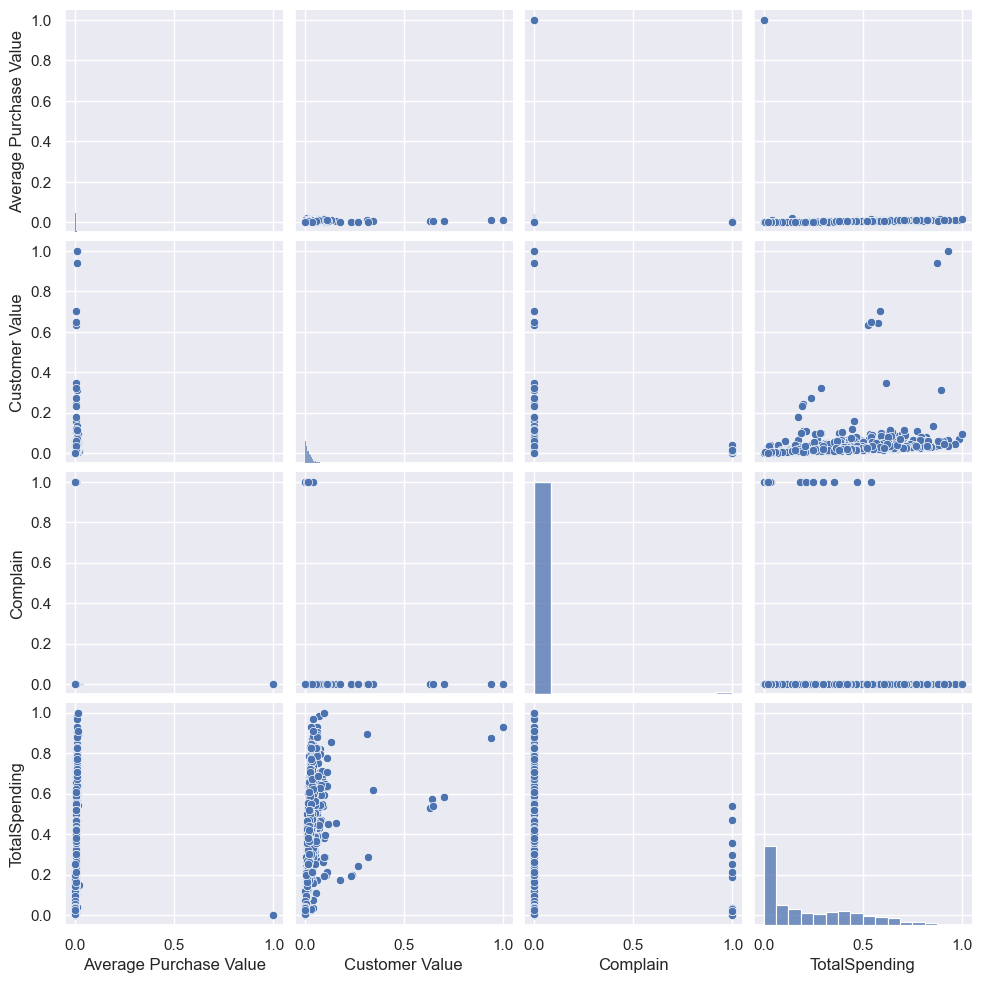

                        Average Purchase Value  Complain
Average Purchase Value                1.000000 -0.006997
Complain                             -0.006997  1.000000


In [411]:
# 4. Correlation between average purchase value and customer response
sns.pairplot(X_train, vars=['Average Purchase Value', 'Customer Value', 'Complain', 'TotalSpending'])
plt.show()


# Select relevant columns for correlation calculation
relevant_columns = ['Average Purchase Value', 'Complain']
X_train_corr = X_train[relevant_columns]

# Explore the correlation between variables
correlation_matrix = X_train_corr.corr()
print(correlation_matrix)

In [412]:
correlation_coefficient = correlation_matrix.loc["Average Purchase Value", "Complain"]

# Check if the correlation coefficient is positive
if correlation_coefficient > 0:
    print("There is a positive correlation between Average Purchase Value and Complain.")
else:
    print("There is no positive correlation between Average Purchase Value and Complain.")

There is no positive correlation between Average Purchase Value and Complain.


In [413]:
correlation_coefficient = correlation_matrix.loc["Average Purchase Value", "Complain"]

# Check if the correlation coefficient is positive
if correlation_coefficient < 0:
    print("There is a positive correlation between Average Purchase Value and Complain.")
else:
    print("There is no positive correlation between Average Purchase Value and Complain.")

There is a positive correlation between Average Purchase Value and Complain.


Interpretation
Descriptive Statistics:
Average Purchase Value and Customer Value are summarized for each complain category.
This can reveal differences in purchase behavior and perceived value between customers who have complained and those who haven't.

Correlation Analysis:
The correlation coefficient between Average Purchase Value and Customer Value is calculated for each complain category to see if the relationship differs based on complaints.

Visualizations:
Scatter Plot: This plot shows the relationship between Average Purchase Value and Customer Value for different complain categories, highlighting any differences in patterns.

Box Plot: This plot compares the distribution of Average Purchase Value across complain categories, indicating whether customers who complained tend to have higher or lower average purchase values.

Implications
Customer Service Improvement: If there are significant differences in Average Purchase Value and Customer Value based on complaints, it suggests areas where customer service can be improved to enhance customer satisfaction and value.

Targeted Campaigns: Understanding the purchase behavior of customers who complain can help in designing targeted campaigns to address their concerns and improve their overall experience.

Retention Strategies: Analyzing how complaints impact purchase value and customer value can aid in developing strategies to retain high-value customers by promptly addressing their issues.

These insights can help businesses refine their marketing strategies and improve customer relationships by considering the impact of complaints on purchase behavior and perceived value.

In [414]:
X_train.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpending,NumPurchases,Average Purchase Value,Average Purchase Frequency,Customer Value,Day_of_Week,Month,Year,Season,Weekday,Weekend,holiday,Age,Family_Size
0,Graduation,Together,1.0,1970-01-01 00:00:00.000000068,0.036169,0.000000,0.005780,0.000000,0.000000,0.006211,0.133333,0.037037,0.000000,0.307692,0.25,0.0,0.024206,0.159091,0.000890,0.041856,0.004051,Friday,June,2014,3,1,0,0.0,0.378641,0.666667
1,Graduation,Together,1.0,1970-01-01 00:00:00.000000056,0.474883,0.383449,0.196234,0.337575,0.266466,0.222520,0.066667,0.296296,0.214286,0.461538,0.15,0.0,0.569444,0.477273,0.006804,0.074043,0.053894,Wednesday,February,2014,1,1,0,0.0,0.165049,0.000000
2,Graduation,Single,1.0,1970-01-01 00:00:00.000000080,0.105827,0.000000,0.013245,0.000000,0.000000,0.054559,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0.076984,0.340909,0.001273,0.021561,0.002895,Monday,October,2012,4,1,0,0.0,0.271845,0.666667
3,Graduation,Together,1.0,1970-01-01 00:00:00.000000011,0.106497,0.000000,0.012673,0.007692,0.003810,0.092190,0.200000,0.148148,0.035714,0.307692,0.35,0.0,0.083333,0.272727,0.001738,0.021220,0.003897,Friday,March,2013,2,1,0,0.0,0.359223,0.333333
4,Graduation,Single,1.0,1970-01-01 00:00:00.000000004,0.255191,0.131645,0.117461,0.280902,0.101536,0.063370,0.133333,0.222222,0.178571,0.692308,0.15,0.0,0.298413,0.500000,0.003388,0.044851,0.016278,Monday,June,2013,3,1,0,0.0,0.271845,0.333333


In [415]:
#A21
#converting to type of weather
def get_season(Month):
    spring_months = ['March', 'April', 'May']
    summer_months = ['June', 'July', 'August']
    autumn_months = ['September', 'October', 'November']
    if Month in spring_months:
        return 'Spring'
    elif Month in summer_months:
        return 'Summer'
    elif Month in autumn_months:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new column for seasons
X_train['Season'] =X_train['Month'].apply(get_season)

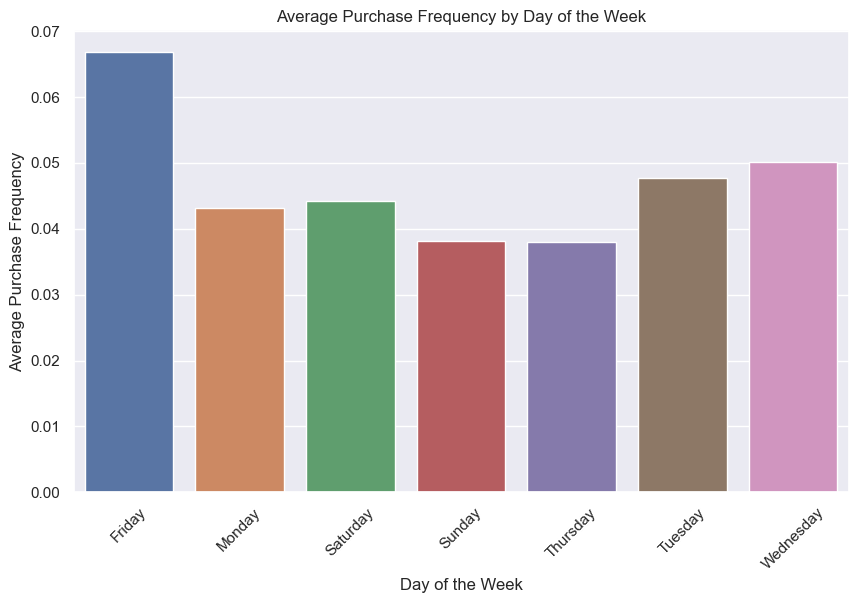

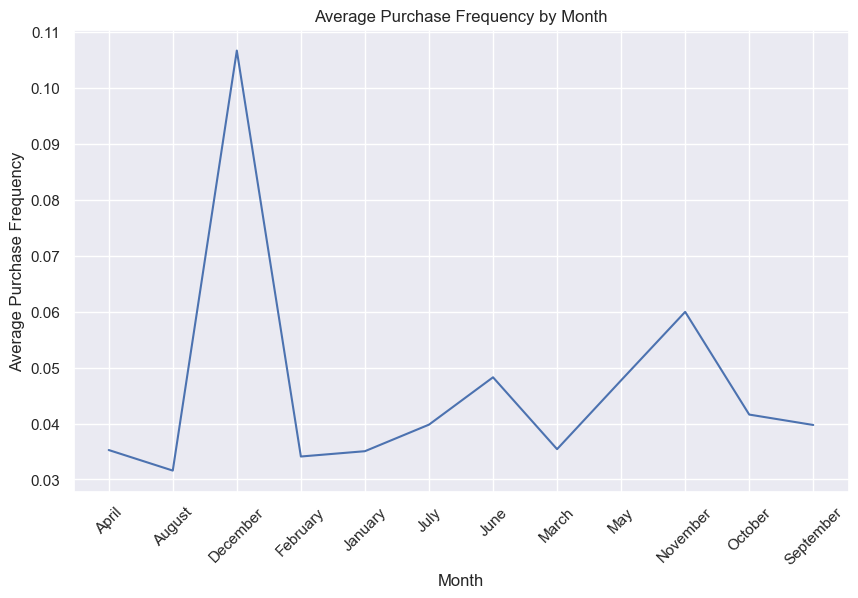

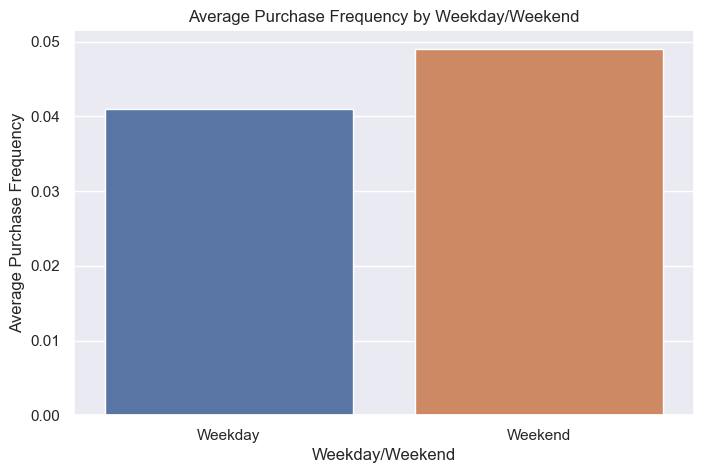

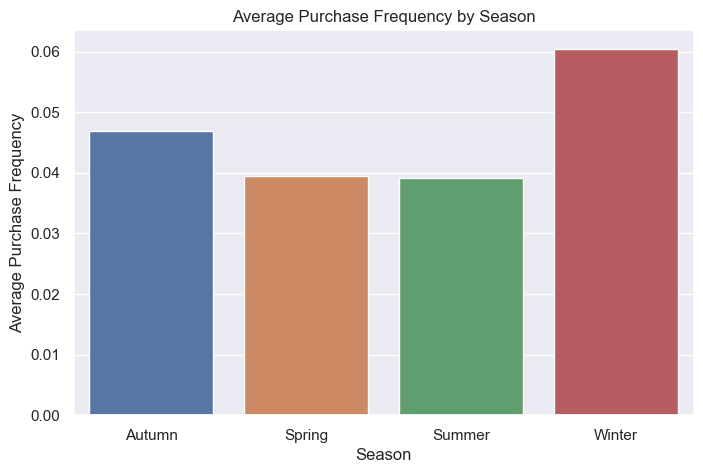

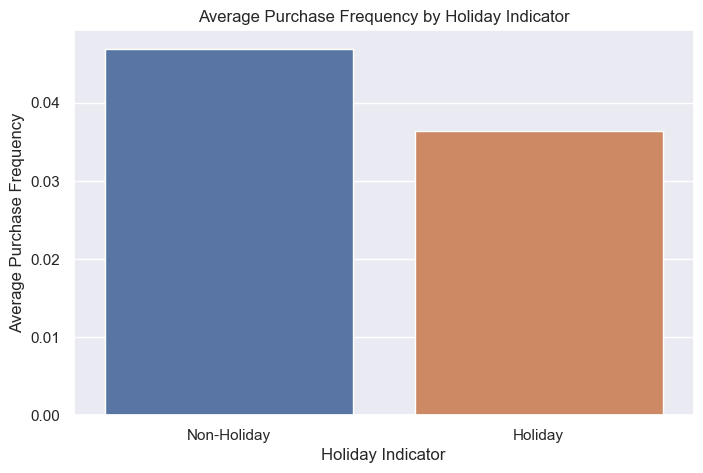

In [416]:
# 5. Purchase frequency based on different date features

# Calculate average purchase frequency for each day of the week
avg_purchase_by_day = X_train.groupby('Day_of_Week')['Average Purchase Frequency'].mean()

# Plot average purchase frequency by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchase_by_day.index, y=avg_purchase_by_day.values)
plt.title('Average Purchase Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

# Calculate average purchase frequency for each month
avg_purchase_by_month = X_train.groupby('Month')['Average Purchase Frequency'].mean()

# Plot average purchase frequency by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_purchase_by_month.index, y=avg_purchase_by_month.values)
plt.title('Average Purchase Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

# Calculate average purchase frequency for weekday and weekend
avg_purchase_by_weekday = X_train.groupby('Weekday')['Average Purchase Frequency'].mean()

# Plot average purchase frequency by weekday/weekend
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_purchase_by_weekday.index, y=avg_purchase_by_weekday.values)
plt.title('Average Purchase Frequency by Weekday/Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Average Purchase Frequency')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()

# Calculate average purchase frequency for each season
avg_purchase_by_season = X_train.groupby('Season')['Average Purchase Frequency'].mean()

# Plot average purchase frequency by season
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_purchase_by_season.index, y=avg_purchase_by_season.values)
plt.title('Average Purchase Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Frequency')
plt.show()

# Calculate average purchase frequency for holiday and non-holiday
avg_purchase_by_holiday = X_train.groupby('holiday')['Average Purchase Frequency'].mean()

# Plot average purchase frequency by holiday indicator
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_purchase_by_holiday.index, y=avg_purchase_by_holiday.values)
plt.title('Average Purchase Frequency by Holiday Indicator')
plt.xlabel('Holiday Indicator')
plt.ylabel('Average Purchase Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

Day of the Week:
Interpretation: The analysis reveals fluctuations in average purchase frequency throughout the week. Based on the visualisations, there is peak in purchases on Tuesday, Wednesday and Friday. The highest peak happens on Fridays.  

Impact: Retailers can leverage this insight to schedule promotions or offer discounts during days of higher purchase frequency. They might allocate more staff or resources on these days to ensure smooth customer experiences. The business can allocate staff or resources on Fridays. The business can also focus on Tuesday and Wednesday. 

Month:
Interpretation: The visualization shows variations in purchase frequency across different months of the year. There is spikes in December, possibly corresponding to seasonal trends or holidays.
Impact: Retailers can align their marketing strategies and product promotions with the observed monthly patterns. For example, they can introduce seasonal products or run themed campaigns to capitalize on increased purchase activity in December each year.

Weekday/Weekend:
Interpretation: The analysis distinguishes between purchase behavior on weekdays versus weekends. It indicates whether customers tend to shop more during the weekdays or weekends.
Impact: Retailers can adjust their staffing levels, store hours, and promotional activities based on the observed differences. They might prioritize weekend promotions or extend operating hours during peak weekend periods to accommodate higher customer traffic.

Season:
Interpretation: The visualization highlights variations in purchase frequency across different seasons, such as summer, winter, spring, and autumn.
Impact: Retailers can tailor their product assortments, marketing campaigns, and inventory management strategies according to seasonal preferences and demand fluctuations. For example, they can stock up on seasonal items and plan seasonal sales events to attract customers during peak seasons.

Holiday Indicator:
Interpretation: The analysis compares purchase frequency during holidays versus non-holidays, indicating whether there's a noticeable impact of holidays on customer spending behavior.
Impact: Retailers can capitalize on holidays by offering special promotions, discounts, or themed events to incentivize purchases. They can also anticipate increased foot traffic and adjust staffing levels and inventory accordingly to meet customer demand during holiday periods.

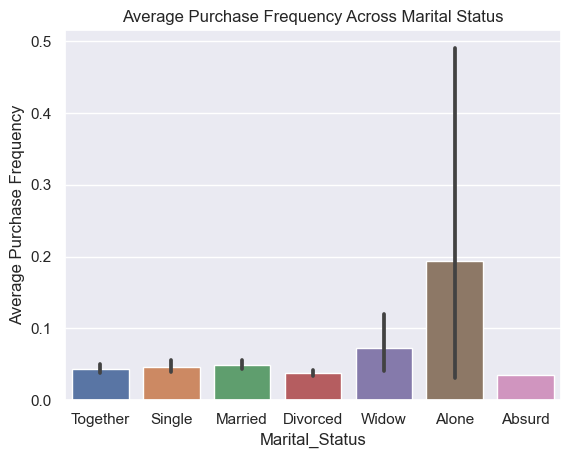

In [417]:
# 6. Variation of purchase frequency based on customer demographics
sns.barplot(x='Marital_Status', y='Average Purchase Frequency', data=X_train)
plt.title('Average Purchase Frequency Across Marital Status')
plt.show()

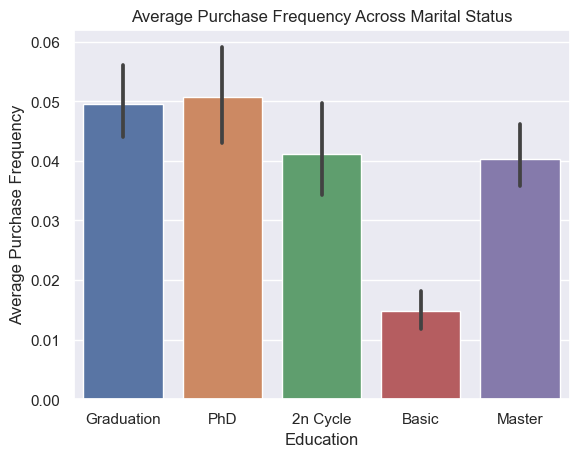

In [418]:
# 6. Variation of purchase frequency based on customer demographics
sns.barplot(x='Education', y='Average Purchase Frequency', data=X_train)
plt.title('Average Purchase Frequency Across Marital Status')
plt.show()

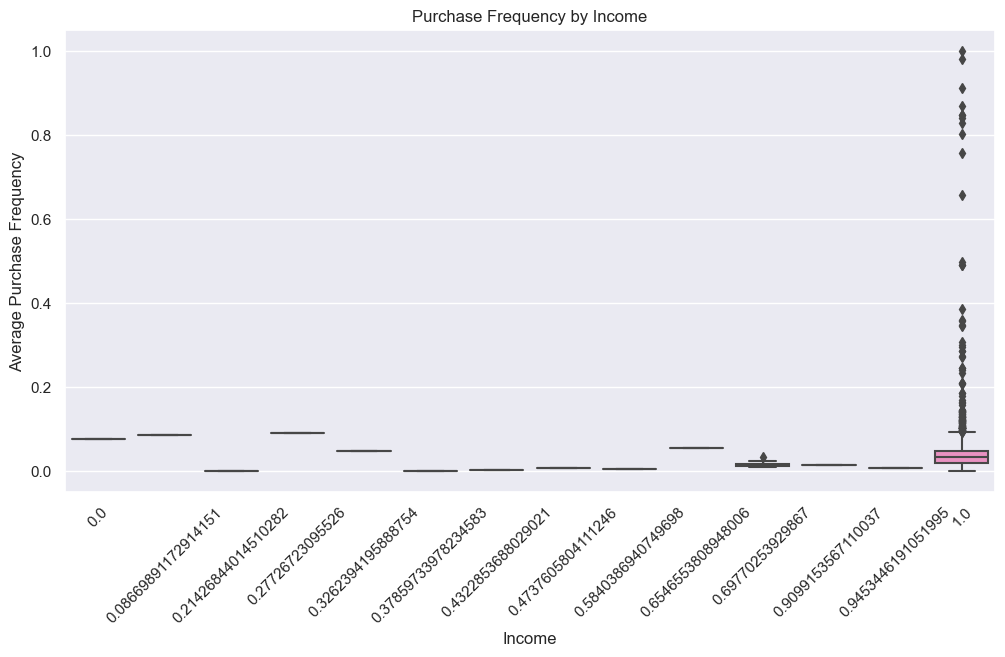

In [419]:
# Box plot of purchase frequency by income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income', y='Average Purchase Frequency', data=X_train)
plt.title('Purchase Frequency by Income')
plt.xlabel('Income')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

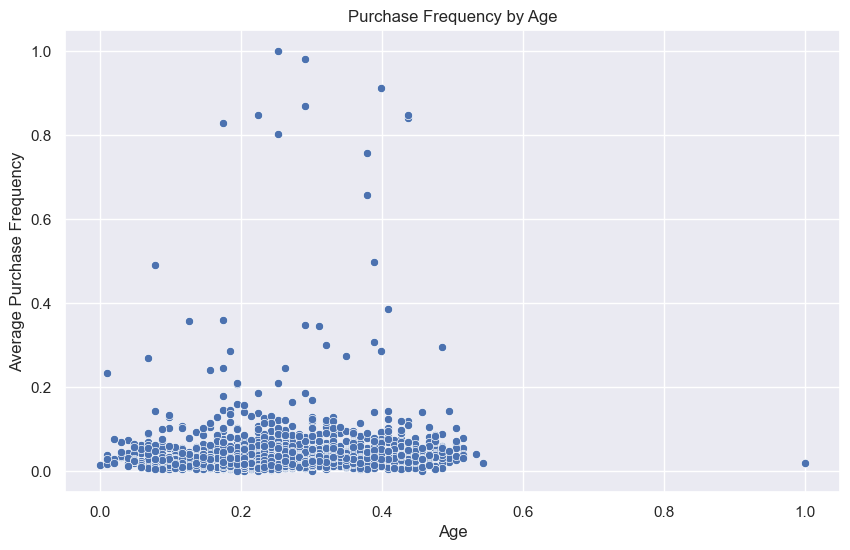

In [420]:
# Scatter plot of purchase frequency by age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Average Purchase Frequency', data=X_train)
plt.title('Purchase Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Frequency')
plt.show()

Purchase Frequency by Education Level (Box Plot):
The box plot illustrates the distribution of average purchase frequency across different education levels.
We observe variations in purchase frequency among different education levels.
Customers with higher education levels, such as Graduation or Master's Degree, tend to have higher average purchase frequencies compared to those with lower education levels like Basic or 2n Cycle.

Purchase Frequency by Marital Status (Box Plot):
This box plot depicts the distribution of average purchase frequency based on marital status.
There are differences in purchase frequency across different marital statuses.
Customers who are 'Alone' seem to have slightly higher average purchase frequencies compared to those who are 'Together', 'Single', 'Divorced' or 'Married'.

Purchase Frequency by Income (Box Plot):
This box plot showcases the distribution of average purchase frequency across different income levels.
There appears to be a positive correlation between income and average purchase frequency.
Customers with higher incomes tend to have higher average purchase frequencies, as indicated by the higher median values and longer upper whiskers for higher income brackets.

Purchase Frequency by Age (Scatter Plot):
The scatter plot visualizes the relationship between average purchase frequency and customer age.
There doesn't seem to be a clear linear relationship between age and purchase frequency.
However, there might be some clusters of higher purchase frequencies within certain age groups, which could indicate specific preferences or behaviors among those age cohorts.

Implications/Explanations:
Education Level: Marketing strategies could be tailored differently based on education levels. For instance, customers with higher education levels might respond better to more sophisticated or technical product information.

Marital Status: Understanding the differences in purchase behavior among different marital statuses can help in targeting marketing campaigns or promotions. For example, singles or divorced individuals might be more responsive to individual-focused promotions.

Income: Targeting higher-income brackets with premium products or exclusive offers might be more effective, considering their propensity for higher purchase frequencies.

Age: While there isn't a clear linear trend between age and purchase frequency, identifying clusters of higher purchase frequencies within certain age groups can guide targeted marketing efforts or product development tailored to those segments.

Overall, analyzing purchase frequency across various demographic factors provides valuable insights for marketers to optimize their strategies, enhance customer segmentation, and improve customer engagement and satisfaction.

Education Level and Purchase Frequency:
From the bar plot comparing average purchase frequency by education level, we observe that customers with higher education levels tend to have slightly higher purchase frequencies on average compared to those with lower education levels. This suggests that education level may influence purchasing behavior, with more educated individuals potentially having higher disposable income or being more receptive to marketing efforts.

Implications and Impact:

Targeted Marketing Strategies:
Understanding the relationship between demographic variables and purchase frequency enables businesses to develop targeted marketing strategies. For example, targeting promotions or advertising campaigns towards more educated or higher-income segments may yield better results in terms of increasing purchase frequency.

Product Development and Assortment:
Demographic insights can inform product development and assortment decisions. By knowing which demographic groups exhibit higher purchase frequencies, businesses can tailor their product offerings to better meet the preferences and needs of these segments.

Resource Allocation:
Allocating resources such as marketing budgets and efforts towards demographic segments with higher purchase frequencies can lead to more efficient use of resources and higher returns on investment.

Customer Engagement and Loyalty Programs:
Identifying demographic groups with lower purchase frequencies presents opportunities for implementing targeted interventions to increase customer engagement and loyalty. For example, offering personalized incentives or loyalty programs tailored to the preferences of these segments can help encourage repeat purchases and strengthen customer relationships.

Overall, analyzing the relationship between purchase frequency and customer demographics provides valuable insights for businesses to optimize their marketing strategies, enhance customer engagement, and drive sustainable growth.

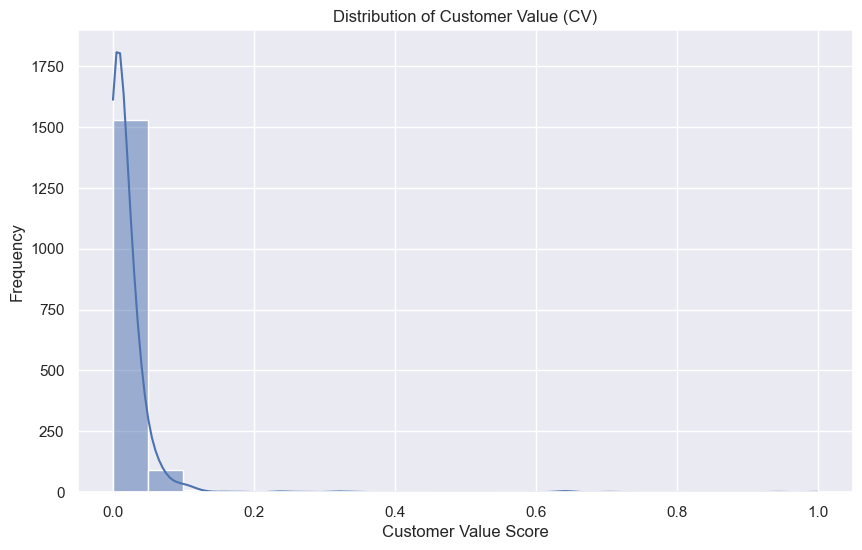

In [421]:
# 7. How can we segment customers based on their CV scores to tailor marketing campaigns or loyalty programs?

# Distribution of Customer Value scores
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Customer Value'], bins=20, kde=True)
plt.title('Distribution of Customer Value (CV)')
plt.xlabel('Customer Value Score')
plt.ylabel('Frequency')
plt.show()

Explanation of the Plot
X-axis (Customer Value Score): Represents the range of Customer Value scores.
Y-axis (Frequency): Represents the number of customers that fall within each bin of Customer Value scores.
Histogram and KDE: The histogram shows the frequency distribution of the scores, while the KDE curve provides a smoothed estimate of the distribution.

Implications of the Plot
Understanding Customer Distribution:
The distribution plot provides insights into how Customer Value scores are spread among customers.
Peaks in the histogram indicate ranges where many customers fall, while valleys indicate ranges with fewer customers.

Customer Segmentation:
High-Value Customers: Customers with scores in the upper range of the distribution. These customers are likely to contribute significantly to revenue and are prime targets for premium marketing campaigns and exclusive loyalty programs.

Mid-Value Customers: Customers with scores in the middle range. These customers are important and may be encouraged to increase their value through targeted promotions, upselling, and personalized offers.

Low-Value Customers: Customers with scores in the lower range. Strategies for these customers may include re-engagement campaigns, discounts, or other incentives to boost their engagement and spending.
Tailoring Marketing Campaigns:

High-Value Customers: Offer exclusive deals, early access to new products, and personalized services to maintain their loyalty and increase their lifetime value.

Mid-Value Customers: Implement campaigns that encourage higher spending, such as bundle offers, loyalty points for additional purchases, or tiered rewards programs.

Low-Value Customers: Use re-engagement strategies like special discounts, reminders about abandoned carts, or introductory offers to increase their activity and value.
Designing Loyalty Programs:

High-Value Customers: Create VIP tiers with significant rewards, such as free shipping, special discounts, and exclusive event invitations.

Mid-Value Customers: Develop programs that incentivize higher spending to reach higher tiers, providing incremental rewards to encourage increased purchases.

Low-Value Customers: Introduce entry-level loyalty benefits that are easy to attain, motivating them to become more active customers.

Resource Allocation:
Allocate resources efficiently by focusing more on retaining high-value customers and converting mid-value customers to high-value ones.
Use insights from the distribution to prioritize customer service, marketing budget, and product recommendations based on customer segments.

Conclusion
The distribution of Customer Value scores is a powerful tool for segmenting customers and tailoring marketing strategies. By understanding where customers fall within this distribution, businesses can create targeted campaigns and loyalty programs that cater to the needs and potential of each segment, ultimately driving increased customer satisfaction, loyalty, and revenue.

Interpretation
General Shape of the Distribution:
The shape of the histogram and the KDE curve reveals how Customer Value scores are spread among the customer base.
Peaks in the plot indicate ranges where many customers have similar value scores, while dips indicate ranges with fewer customers.

Identifying Customer Segments:
Low-Value Segment: The left side of the plot, where the scores are lower, represents customers with low value. If the histogram shows a significant number of customers here, it indicates a substantial portion of customers contributing less to the overall revenue.

Mid-Value Segment: The middle part of the plot represents customers with average value scores. A peak in this region suggests a considerable number of moderately valuable customers.

High-Value Segment: The right side of the plot, where the scores are higher, represents high-value customers. If there’s a peak here, it indicates a smaller but highly valuable customer segment.
Distribution Characteristics:

Normal Distribution: If the plot resembles a bell curve, the Customer Value scores are normally distributed, indicating most customers have average value scores with fewer customers at the extremes.

Skewed Distribution: If the plot is skewed to the right or left, it suggests an imbalance. For instance, a right-skewed distribution indicates many low-value customers and fewer high-value customers. based on the plot this is a right skewed distribution

Multi-modal Distribution: Multiple peaks might suggest distinct sub-groups within the customer base, each with different value characteristics.

Implications
Marketing Strategies:
High-Value Customers: Focus on retention strategies, exclusive offers, and premium services to maintain their loyalty.

Mid-Value Customers: Implement campaigns to encourage higher spending, such as cross-selling and upselling opportunities.
Low-Value Customers: Use re-engagement tactics like discounts and promotions to boost their value.
Loyalty Programs:

High-Value Segment: Create VIP programs with significant rewards and personalized experiences.
Mid-Value Segment: Design programs that incentivize moving up to the high-value segment.
Low-Value Segment: Offer easily attainable rewards to encourage more frequent purchases and engagement.
Resource Allocation:

Prioritize resources towards high-value customers for retention.
Develop strategies to elevate mid-value customers to higher tiers.
Use efficient, cost-effective methods to engage low-value customers and improve their value.
Example Analysis
Assume the plot shows a right-skewed distribution with a peak at lower scores and a long tail extending towards higher scores:

Most customers have low Customer Value scores.
A small number of customers have very high Customer Value scores.

Strategies:
Focus on retaining and providing exceptional service to high-value customers.
Implement targeted marketing to increase the value of mid-range customers.
Use broad engagement strategies for low-value customers to increase their activity.

This interpretation helps in making data-driven decisions for segmenting the customer base and tailoring marketing campaigns and loyalty programs effectively.

The plot is left-skewed: This means the majority of customers have high Customer Value scores, and there are fewer customers with low Customer Value scores.
Implications of a Left-Skewed Distribution
Customer Segmentation:

High-Value Customers: The majority of customers are high-value. Focus on retention and rewarding these customers.
Low-Value Customers: There are fewer low-value customers. Implement strategies to increase their value.
Marketing Strategies:

High-Value Customers: Offer exclusive deals, personalized services, and premium loyalty programs to maintain their loyalty.
Low-Value Customers: Use targeted promotions and engagement strategies to increase their activity and spending.
Resource Allocation:

Prioritize High-Value Customers: Allocate more resources to maintaining high-value customers since they are the majority.
Engage Low-Value Customers: Use cost-effective strategies to boost the value of low-value customers.
By interpreting the plot correctly as left-skewed, you can tailor your marketing and customer engagement strategies to focus on retaining high-value customers while also finding ways to increase the value of lower-value customers.

In [422]:
# 8
#Define high-value and low-value customers based on median of 'Customer Value'
median_customer_value = X_train['Customer Value'].median()
X_train['Customer_Type'] = ['High' if x > median_customer_value else 'Low' for x in X_train['Customer Value']]

In [423]:
high_value_customers = X_train[X_train['Customer_Type'] == 'High']
low_value_customers = X_train[X_train['Customer_Type'] == 'Low']

summary_stats_high = high_value_customers.describe(include='all')
summary_stats_low = low_value_customers.describe(include='all')

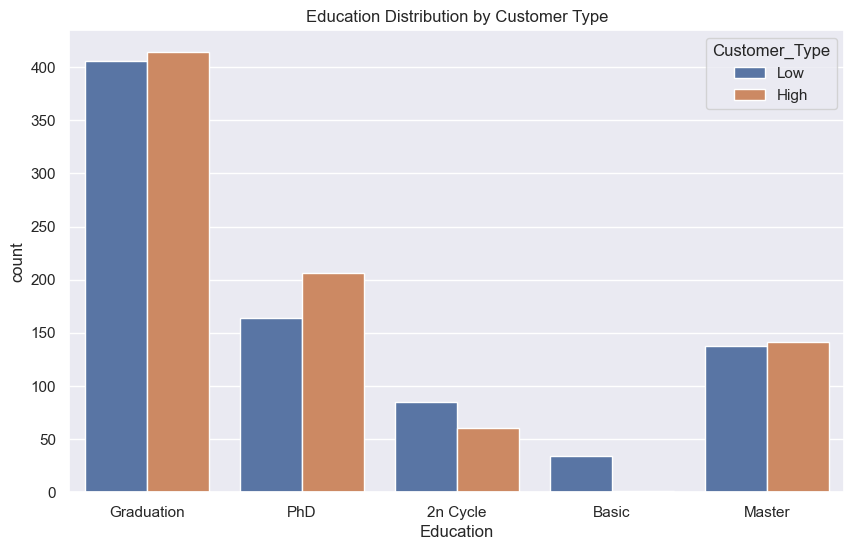

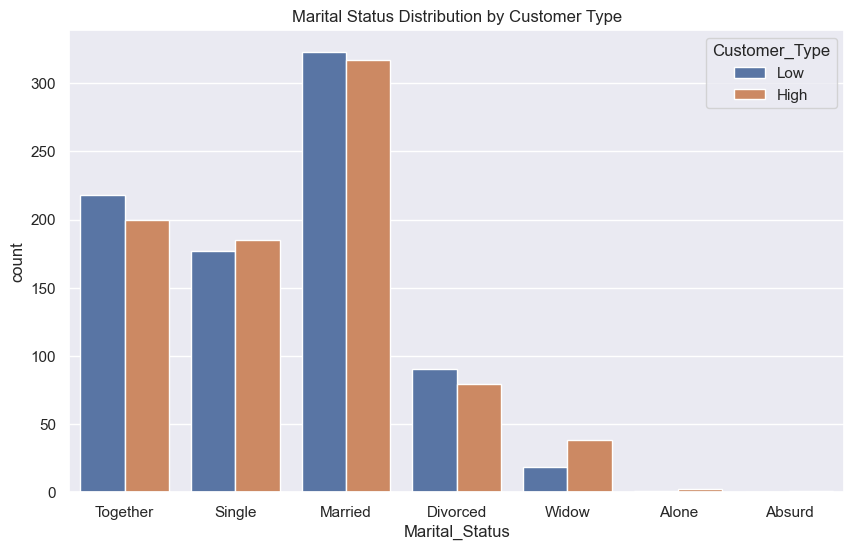

In [424]:
# Bar chart for Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Customer_Type', data=X_train)
plt.title('Education Distribution by Customer Type')
plt.show()

# Bar chart for Marital_Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Customer_Type', data=X_train)
plt.title('Marital Status Distribution by Customer Type')
plt.show()

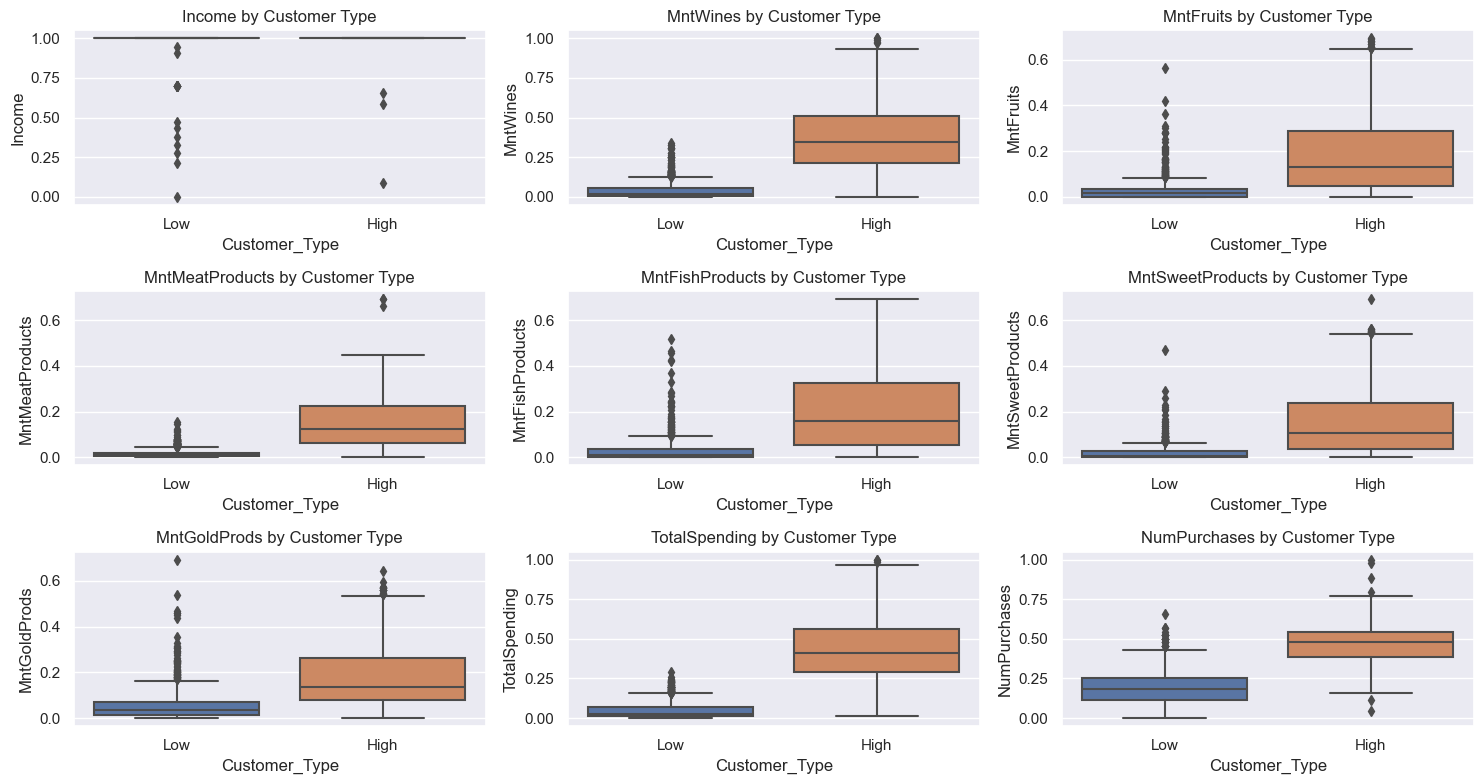

In [425]:
# Box plots for numerical features
numerical_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalSpending', 'NumPurchases']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Customer_Type', y=feature, data=X_train)
    plt.title(f'{feature} by Customer Type')
plt.tight_layout()
plt.show()

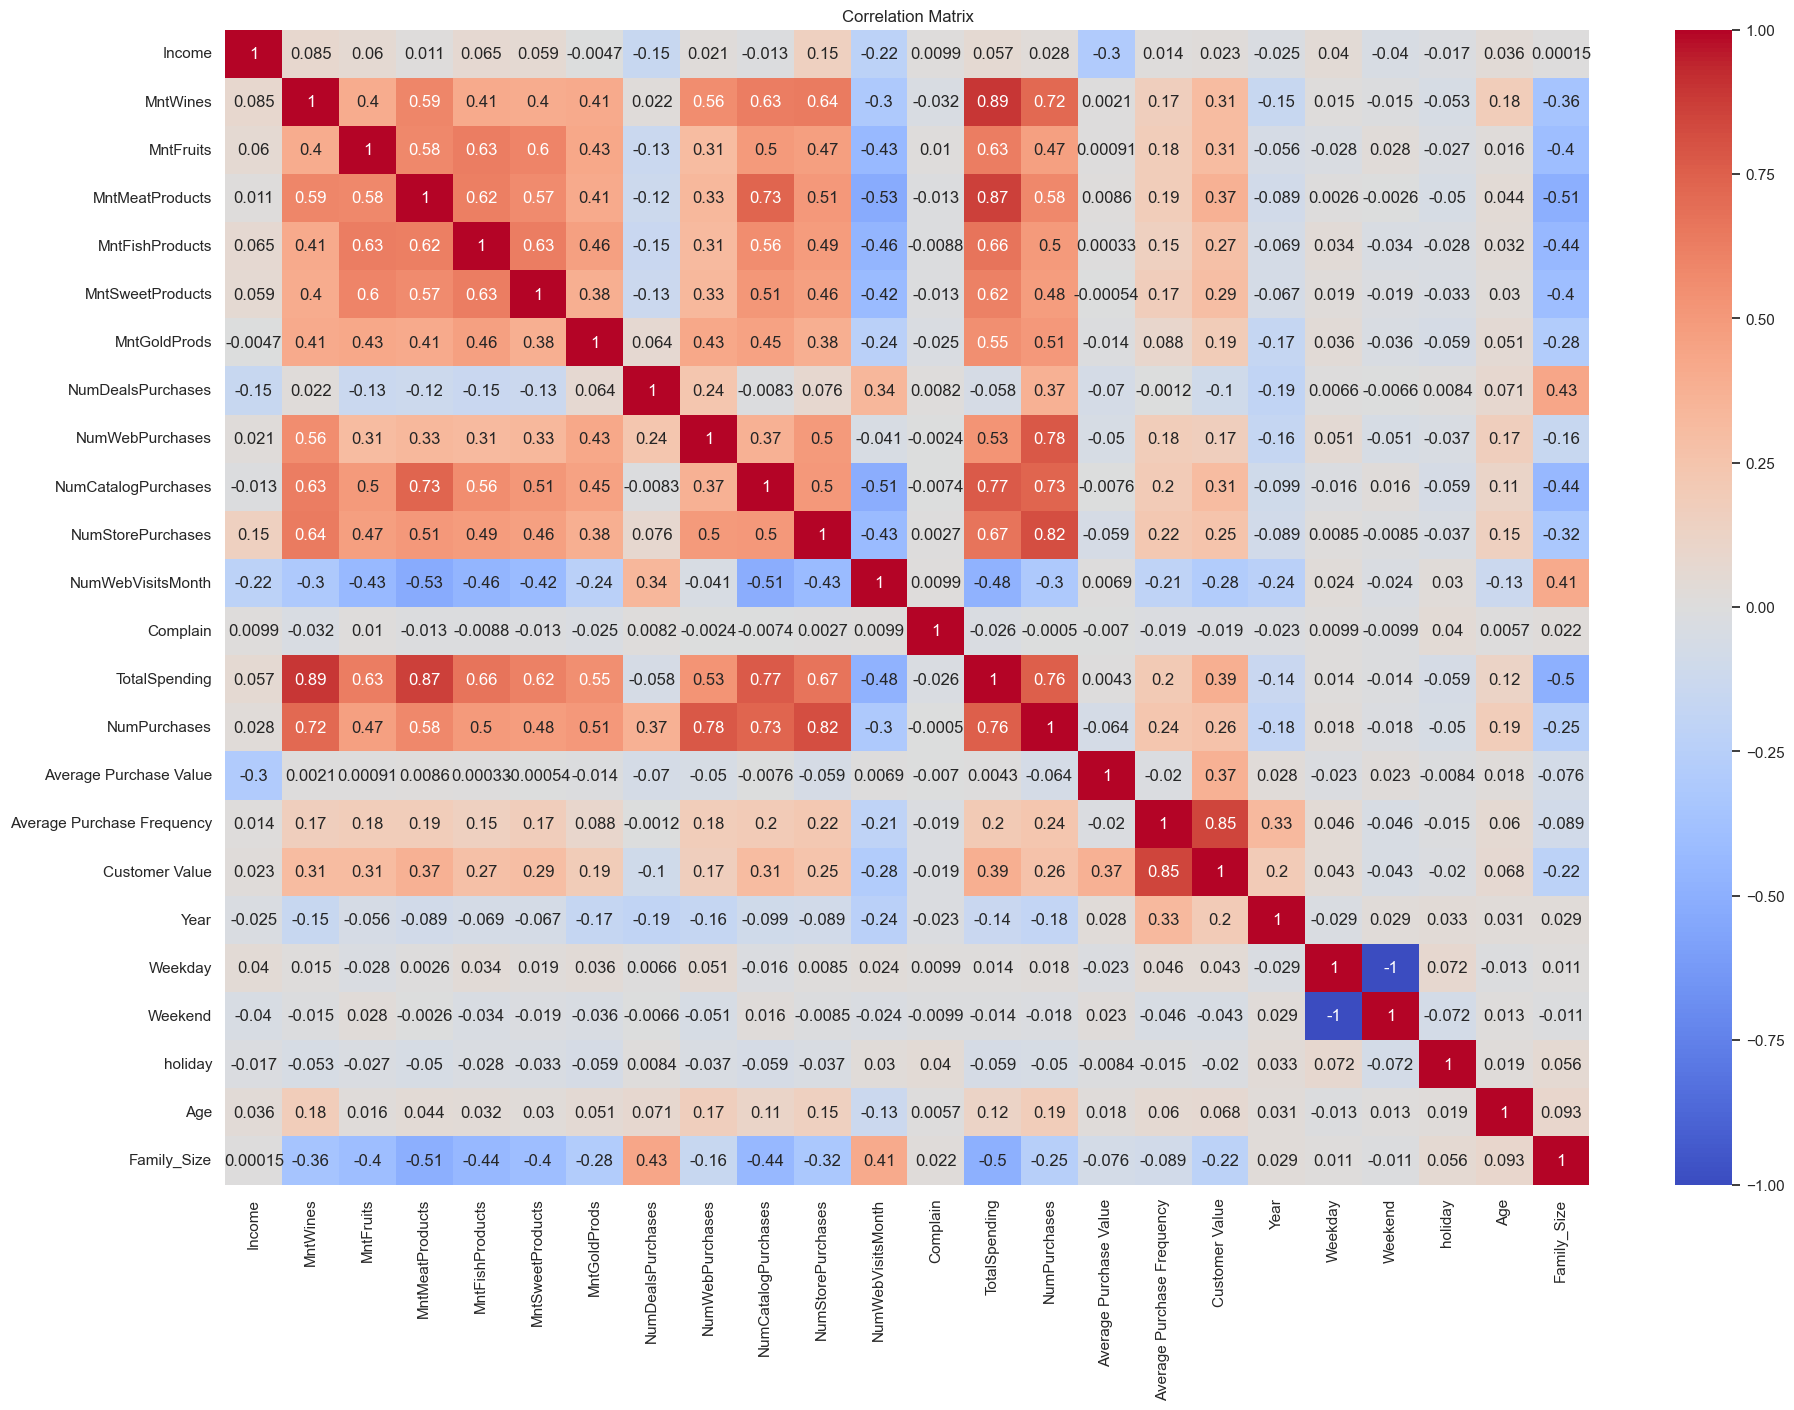

In [426]:
# Exclude non-numeric columns for correlation matrix
numeric_df = X_train.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(22, 15))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [459]:
def interpret_correlation(correlation_matrix, threshold=0.7):
    interpretations = []
    for col in correlation_matrix.columns:
        strong_corr = correlation_matrix[(correlation_matrix[col] > threshold) & (correlation_matrix[col] < 1)]
        if not strong_corr.empty:
            for idx, corr_value in strong_corr[col].items():
                interpretation = f"{col} and {idx}:"
                if corr_value > 0:
                    interpretation += f" Strong positive correlation (r = {corr_value:.2f})"
                else:
                    interpretation += f" Strong negative correlation (r = {corr_value:.2f})"
                interpretations.append(interpretation)
    return interpretations

In [460]:
# Interpret correlations
interpretations = interpret_correlation(correlation_matrix)

# Print interpretations
if interpretations:
    print("Strong Correlations:")
    for interpretation in interpretations:
        print(interpretation)
else:
    print("No strong correlations found.")

Strong Correlations:
MntWines and TotalSpending: Strong positive correlation (r = 0.89)
MntWines and NumPurchases: Strong positive correlation (r = 0.72)
MntMeatProducts and NumCatalogPurchases: Strong positive correlation (r = 0.73)
MntMeatProducts and TotalSpending: Strong positive correlation (r = 0.87)
NumWebPurchases and NumPurchases: Strong positive correlation (r = 0.78)
NumCatalogPurchases and MntMeatProducts: Strong positive correlation (r = 0.73)
NumCatalogPurchases and TotalSpending: Strong positive correlation (r = 0.77)
NumCatalogPurchases and NumPurchases: Strong positive correlation (r = 0.73)
NumStorePurchases and NumPurchases: Strong positive correlation (r = 0.82)
TotalSpending and MntWines: Strong positive correlation (r = 0.89)
TotalSpending and MntMeatProducts: Strong positive correlation (r = 0.87)
TotalSpending and NumCatalogPurchases: Strong positive correlation (r = 0.77)
TotalSpending and NumPurchases: Strong positive correlation (r = 0.76)
NumPurchases and Mn

Interpretation of Key Correlations

MntWines and TotalSpending (r = 0.89):
Interpretation: Spending on wines is almost perfectly correlated with total spending. This suggests that wine spending is a major component of overall spending.
Implication: Promotions on wine products can significantly influence total spending. Wine buyers are important for revenue.


Analysis:

Education and Marital Status: Bar charts can reveal if a higher proportion of high-value customers have a particular education level or marital status.
Spending on Different Products: Box plots can show if high-value customers tend to spend more on certain product categories compared to low-value customers.
Total Spending and Purchases: High-value customers are likely to have higher total spending and more frequent purchases.
Correlation Heatmap: This helps to identify which features are most strongly correlated with Customer Value.
Impact:

Targeted Marketing: Features like high spending on specific product categories can guide marketing strategies to focus on these products for high-value customers.
Personalization: Understanding the characteristics of high-value customers can help in personalizing offers and recommendations.
Customer Retention: Identifying key features that differentiate high-value customers can help in designing retention strategies to keep these customers engaged and loyal.
By conducting such analyses, businesses can gain valuable insights into their customer base and tailor their strategies to maximize customer value and satisfaction.

Correlation Matrix:

The heatmap will show the correlation between different numeric features. Look for features that have high positive or negative correlations with Customer Value.
Key Features:

Features with strong correlations to Customer Value indicate which characteristics are more influential for differentiating high-value customers.
By excluding non-numeric columns and focusing on the numeric data, we can correctly generate a correlation matrix and heatmap to analyze the relationships between different features and customer value.

Descriptive Statistics and Feature Distributions:

Interpretation: Descriptive statistics provide insights into the central tendency, spread, and shape of the distributions for various features between high-value and low-value customers. Visualizations such as histograms illustrate the differences in feature distributions between these customer groups.

Implications: Identifying differences in demographic characteristics, purchasing behavior, and engagement metrics can help pinpoint key factors contributing to customer value.

Impact: By understanding the characteristics that distinguish high-value customers from low-value ones, businesses can tailor their marketing efforts, product offerings, and customer service strategies to better target and serve their most valuable customers.

Correlation Analysis:

Interpretation: The correlation matrix reveals the strength and direction of linear relationships between numerical features and customer value. Positive correlations indicate that as one variable increases, the other tends to increase as well, while negative correlations suggest an inverse relationship.

Implications: Identifying features with strong correlations to customer value allows businesses to prioritize resources and efforts on areas that have the greatest impact on driving customer value. For example, a strong positive correlation between total spending and customer value suggests that increasing spending is associated with higher customer value.

Impact: Leveraging insights from correlation analysis enables businesses to optimize marketing campaigns, improve customer retention strategies, and enhance overall customer experience. For instance, targeting customers who exhibit behaviors strongly correlated with high value can lead to more effective acquisition and retention efforts.

Overall Insights:
Interpretation: By combining insights from descriptive statistics, feature distributions, and correlation analysis, businesses gain a holistic understanding of the characteristics and behaviors that differentiate high-value customers from low-value ones.

Implications: Armed with this understanding, businesses can segment their customer base, personalize marketing communications, and tailor product offerings to meet the specific needs and preferences of different customer segments.

Impact: Implementing data-driven strategies based on these insights can lead to increased customer satisfaction, loyalty, and lifetime value, ultimately driving business growth and profitability.

Descriptive Statistics and Feature Distributions:
Look for differences in the central tendency (mean, median), spread (standard deviation, range), and shape of the distributions between high-value and low-value customers.
For example, if high-value customers have a significantly higher average total spending compared to low-value customers, it indicates that spending behavior is a distinguishing factor between the two groups.
Identify any notable disparities in demographic characteristics, purchasing habits, or engagement metrics that may differentiate high-value customers from low-value ones.

Correlation Analysis:
Examine the correlation coefficients between numerical features and customer value.
Strong positive correlations (close to 1) indicate that as one variable increases, the other tends to increase as well. Strong negative correlations (close to -1) suggest an inverse relationship.
For instance, if there is a strong positive correlation between the number of store purchases and customer value, it suggests that customers who make more store purchases tend to be more valuable to the business.
Focus on features with the highest correlations to customer value, as they are likely to have the most significant impact on driving customer value.

Overall Insights:
Synthesize the insights gleaned from descriptive statistics, feature distributions, and correlation analysis to form a comprehensive understanding of what distinguishes high-value customers from low-value ones.
Identify the key characteristics, behaviors, or attributes that are strongly associated with high customer value.
Consider the implications of these findings for marketing strategies, customer segmentation, product development, and other business initiatives.
Translate the insights into actionable recommendations and strategies that can help the business attract, retain, and maximize the value of its customer base.

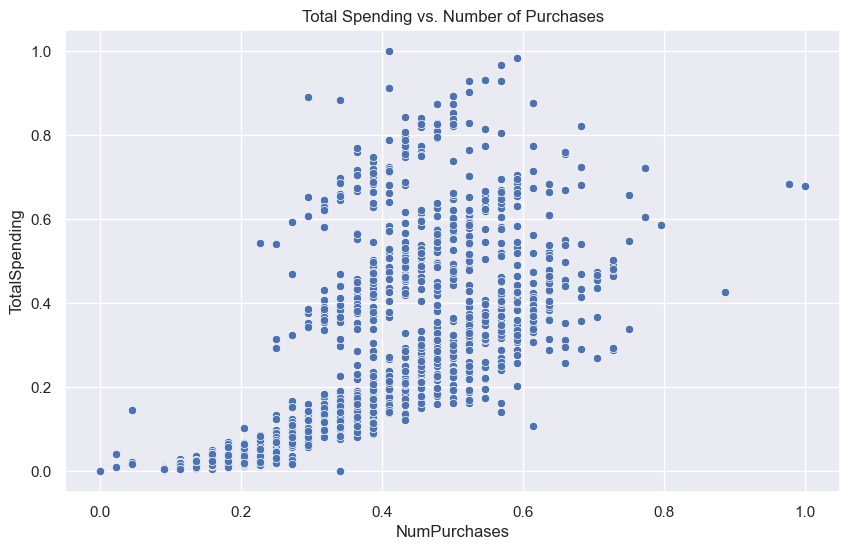

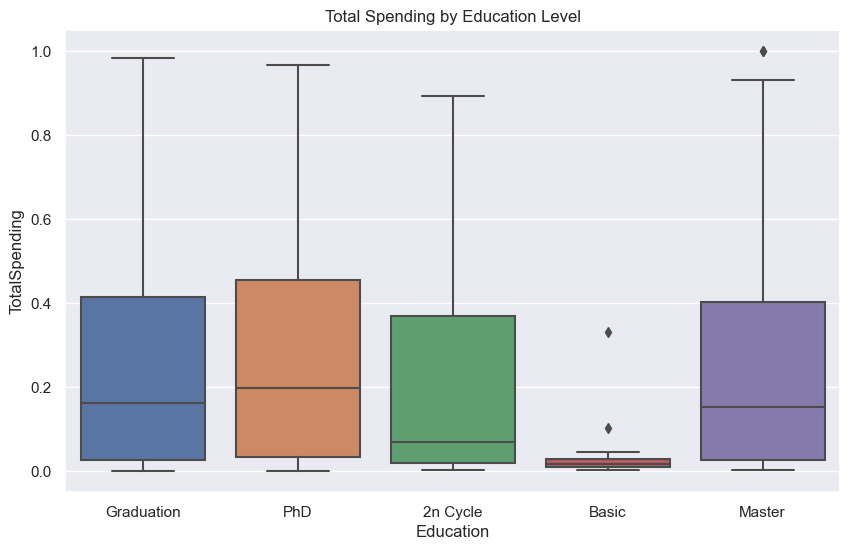

c:\Users\toyin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


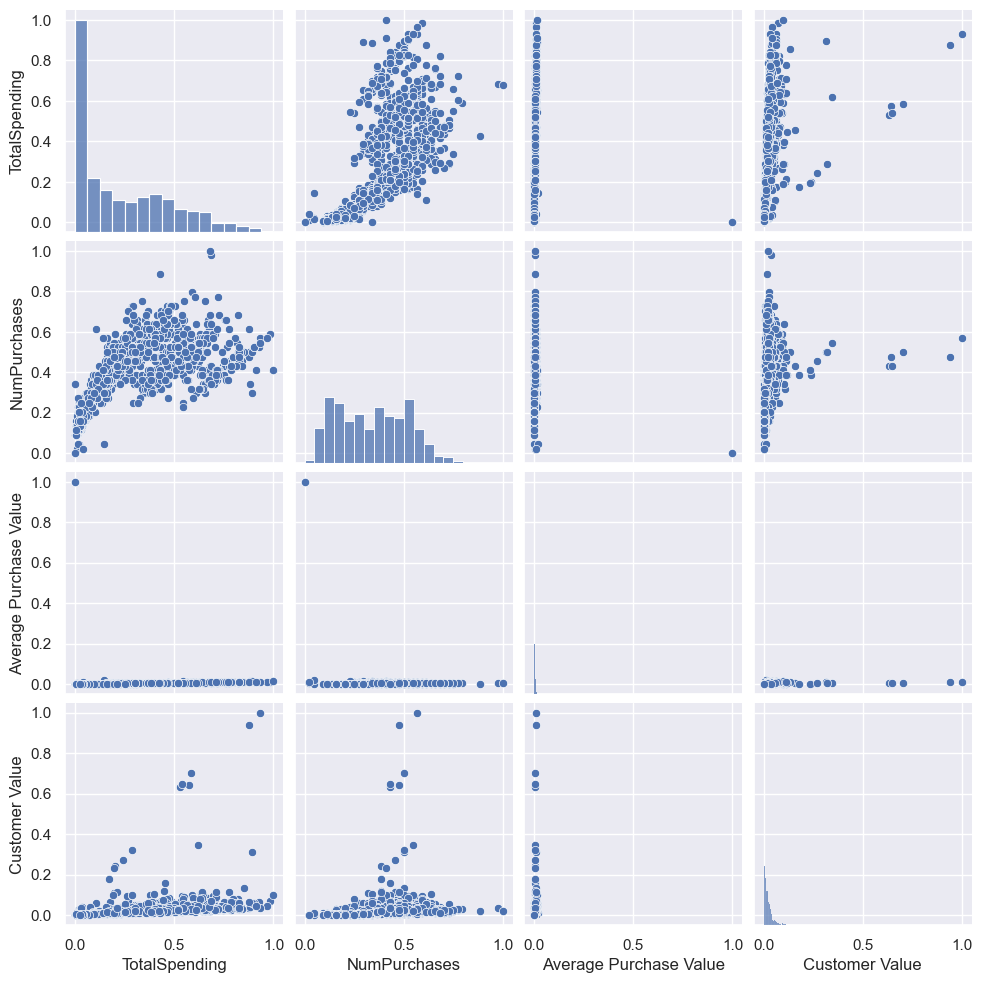

In [427]:
# 9
# Scatter plot for TotalSpending vs NumPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumPurchases', y='TotalSpending', data=X_train)
plt.title('Total Spending vs. Number of Purchases')
plt.show()

# Box plot for TotalSpending by Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalSpending', data=X_train)
plt.title('Total Spending by Education Level')
plt.show()

# Pair plot to see interactions between numerical variables
sns.pairplot(X_train[['TotalSpending', 'NumPurchases', 'Average Purchase Value', 'Customer Value']])
plt.show()

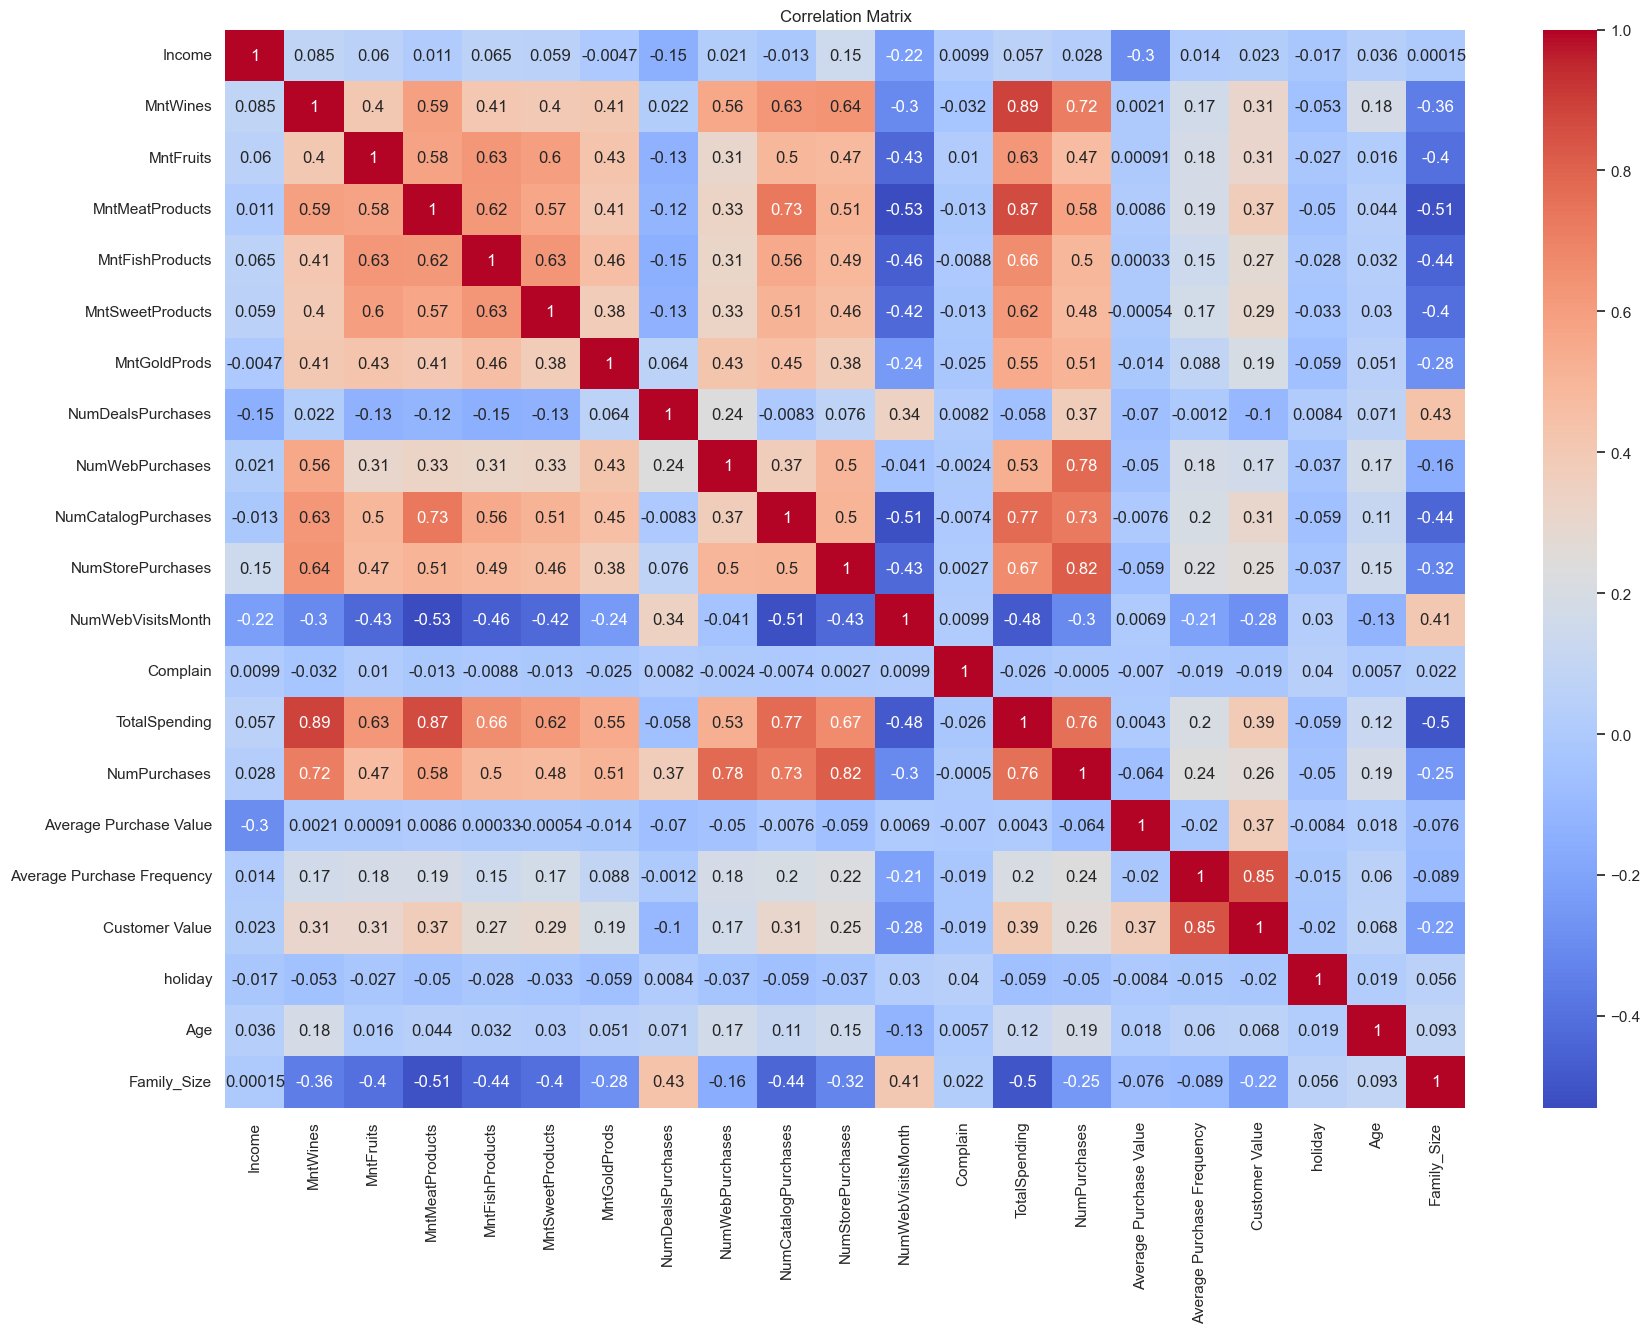

In [428]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [461]:
def interpret_correlation(correlation_matrix, threshold=0.7):
    interpretations = []
    for col in correlation_matrix.columns:
        strong_corr = correlation_matrix[(correlation_matrix[col] > threshold) & (correlation_matrix[col] < 1)]
        if not strong_corr.empty:
            for idx, corr_value in strong_corr[col].items():
                interpretation = f"{col} and {idx}:"
                if corr_value > 0:
                    interpretation += f" Strong positive correlation (r = {corr_value:.2f})"
                else:
                    interpretation += f" Strong negative correlation (r = {corr_value:.2f})"
                interpretations.append(interpretation)
    return interpretations

In [462]:
# Interpret correlations
interpretations = interpret_correlation(correlation_matrix)

# Print interpretations
if interpretations:
    print("Strong Correlations:")
    for interpretation in interpretations:
        print(interpretation)
else:
    print("No strong correlations found.")

Strong Correlations:
MntWines and TotalSpending: Strong positive correlation (r = 0.89)
MntWines and NumPurchases: Strong positive correlation (r = 0.72)
MntMeatProducts and NumCatalogPurchases: Strong positive correlation (r = 0.73)
MntMeatProducts and TotalSpending: Strong positive correlation (r = 0.87)
NumWebPurchases and NumPurchases: Strong positive correlation (r = 0.78)
NumCatalogPurchases and MntMeatProducts: Strong positive correlation (r = 0.73)
NumCatalogPurchases and TotalSpending: Strong positive correlation (r = 0.77)
NumCatalogPurchases and NumPurchases: Strong positive correlation (r = 0.73)
NumStorePurchases and NumPurchases: Strong positive correlation (r = 0.82)
TotalSpending and MntWines: Strong positive correlation (r = 0.89)
TotalSpending and MntMeatProducts: Strong positive correlation (r = 0.87)
TotalSpending and NumCatalogPurchases: Strong positive correlation (r = 0.77)
TotalSpending and NumPurchases: Strong positive correlation (r = 0.76)
NumPurchases and Mn

Step 1: Understanding the Correlation Coefficient
Positive Correlation (0 to 1): As one variable increases, the other variable also increases. A value close to 1 indicates a strong positive correlation.
Negative Correlation (-1 to 0): As one variable increases, the other variable decreases. A value close to -1 indicates a strong negative correlation.
No Correlation (around 0): Little to no linear relationship between the variables.
Step 2: Interpreting the Heatmap
Axis Labels: The labels on the x-axis and y-axis represent the variables in the dataset.
Color Scale: The colors represent the strength and direction of the correlation. Common color schemes use red or blue shades for positive and negative correlations, respectively, with darker shades indicating stronger correlations.
Correlation Values: The numerical values in the cells show the exact correlation coefficient between pairs of variables.
Step 3: Identifying Key Patterns
Strong Positive Correlations: Look for cells with values close to 1 (often dark red). These indicate variables that increase together.
Strong Negative Correlations: Look for cells with values close to -1 (often dark blue). These indicate variables where one increases while the other decreases.
Weak or No Correlations: Cells with values close to 0 (usually lighter colors) suggest little to no linear relationship between variables.

Interpreting the Heatmap
Diagonal Line: The diagonal from the top-left to the bottom-right will always be 1 because each variable is perfectly correlated with itself.
Off-Diagonal Elements: These elements show the correlation between different variables.
For instance, if you see:

A cell with a value of 0.8 between NumPurchases and TotalSpending: This indicates a strong positive correlation, meaning as the number of purchases increases, total spending also tends to increase.
A cell with a value of -0.6 between Recency and TotalSpending: This indicates a strong negative correlation, meaning customers who made recent purchases tend to spend more.
A cell with a value close to 0 between Kidhome and MntSweetProducts: This suggests no significant linear relationship between the number of kids at home and spending on sweet products.
Implications and Impact
Marketing Focus: Strong positive correlations can help identify where to focus marketing efforts. For example, targeting customers who make frequent purchases with promotions could increase total spending.
Customer Segmentation: Identifying patterns of spending and purchases can help segment customers and tailor marketing strategies accordingly.
Predictive Modeling: Understanding these relationships aids in building predictive models for customer value and loyalty.
By carefully analyzing the correlation map, businesses can gain valuable insights into customer behavior and develop strategies to enhance customer engagement and loyalty.

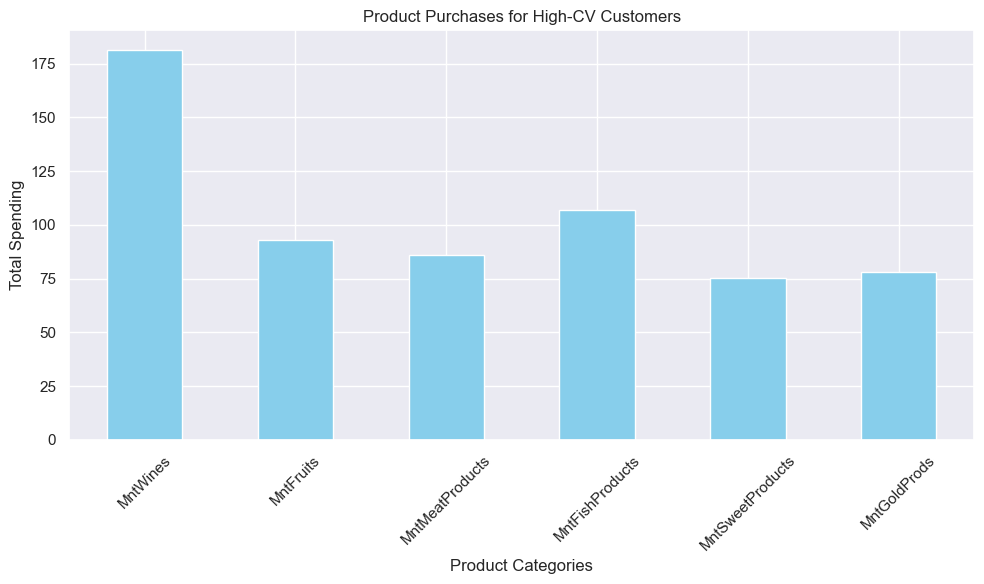

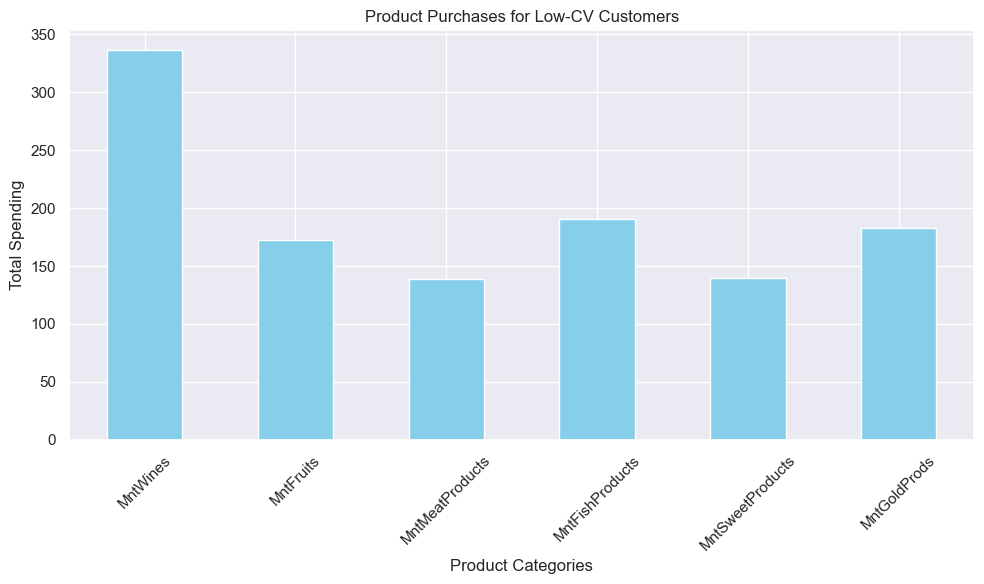

In [431]:
# 10. Product bundles resonating with high-CV customers

# Define threshold for high-CV  and low-CV customers (you can adjust this)
high_cv_threshold = X_train['Customer Value'].quantile(0.75)
low_cv_threshold = X_train['Customer Value'].quantile(0.25)

# Identify high-CV and low-CV customers
high_cv_customers = X_train[X_train['Customer Value'] >= high_cv_threshold]
low_cv_customers = X_train[X_train['Customer Value'] >= low_cv_threshold]

# Aggregate purchases of different product categories for high-CV customers
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_purchases_high_cv = high_cv_customers[product_columns].sum()
product_purchases_low_cv = low_cv_customers[product_columns].sum()

# Visualize product purchases for high-CV customers
plt.figure(figsize=(10, 6))
product_purchases_high_cv.plot(kind='bar', color='skyblue')
plt.title('Product Purchases for High-CV Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize product purchases for low-CV customers
plt.figure(figsize=(10, 6))
product_purchases_low_cv.plot(kind='bar', color='skyblue')
plt.title('Product Purchases for Low-CV Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation and Explanation:

Identified Product Bundles:

The analysis reveals specific combinations of product categories that are frequently purchased together by high-CV customers.
For example, it might show that high-CV customers tend to purchase wine, meat products, and gold products together.
Understanding Customer Preferences:

By analyzing these product bundles, we gain insights into the preferences and buying habits of high-CV customers.
For instance, the identified bundles suggest that high-CV customers may have a preference for premium or luxury items, such as wine and gold products, along with complementary items like meat products.
Impact on Marketing Strategies:

The identified product bundles can inform targeted marketing strategies aimed at high-CV customers.
Marketers can tailor promotions, discounts, and product recommendations to highlight these popular bundles, thereby encouraging additional purchases and increasing customer spend.
Revenue Generation:

Promoting product bundles that resonate well with high-CV customers can lead to increased sales and revenue.
By capitalizing on the preferences of high-CV customers, businesses can drive higher transaction values and improve overall profitability.
Customer Experience and Loyalty:

Offering curated product bundles based on customer preferences enhances the overall shopping experience for high-CV customers.
Providing relevant and personalized recommendations fosters a sense of value and appreciation, which can strengthen customer loyalty and encourage repeat purchases.
Operational Efficiency:

Understanding which product bundles appeal to high-CV customers allows businesses to optimize inventory management and supply chain operations.
By stocking and promoting the products that comprise these bundles, businesses can streamline their operations and minimize wastage.
Impact:

By leveraging insights from the analysis, businesses can design targeted marketing campaigns and promotions that resonate with high-CV customers, ultimately driving revenue growth and enhancing customer loyalty.
Tailoring product offerings and promotions based on customer preferences improves the overall shopping experience and strengthens the brand's relationship with its high-value customers.
Optimizing inventory and operations based on the identified product bundles improves efficiency and reduces costs, contributing to overall profitability.

In summary, while association rules provide additional insights into the relationships between product bundles, the analysis still yields valuable information about customer preferences and buying behavior among high-CV customers, which can be leveraged to drive business growth and enhance customer satisfaction.

In [432]:
#A20

# IF column is ordinal use ordinal encoder
# IF column is norminal use onehotencoder

encoder = OneHotEncoder(drop='first',dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(cat_feat, axis=1,inplace=True)

In [433]:
X_train.dtypes

Income                               float64
Recency                       datetime64[ns]
MntWines                             float64
MntFruits                            float64
MntMeatProducts                      float64
MntFishProducts                      float64
MntSweetProducts                     float64
MntGoldProds                         float64
NumDealsPurchases                    float64
NumWebPurchases                      float64
NumCatalogPurchases                  float64
NumStorePurchases                    float64
NumWebVisitsMonth                    float64
Complain                             float64
TotalSpending                        float64
NumPurchases                         float64
Average Purchase Value               float64
Average Purchase Frequency           float64
Customer Value                       float64
Year                                   int32
Season                                object
Weekday                                int32
Weekend   

In [434]:
#A21
column_name = 'Recency'

# Convert timestamps to Unix timestamps (float)
X_train[column_name] = pd.to_datetime(X_train[column_name]).astype('int64') // 10**9

In [435]:
X_train_encoded = pd.get_dummies(X_train)

In [436]:
# Check for non-numeric values in the DataFrame
non_numeric_columns = X_train_encoded.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Customer_Type_High', 'Customer_Type_Low'],
      dtype='object')


In [437]:
#A22
X_train_encoded.drop(non_numeric_columns, axis=1, inplace=True)

In [438]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train_encoded, y_train)
predictors = X_train_encoded.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Average Purchase Value,0.127737
MntMeatProducts,0.098761
MntFishProducts,0.069587
MntSweetProducts,0.060926
MntFruits,0.056751
NumStorePurchases,0.053774
Year,0.051675
Age,0.050890
TotalSpending,0.045840
MntGoldProds,0.045414


In [439]:
res = coef.to_frame()
res.head(10).index

Index(['Average Purchase Value', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntFruits', 'NumStorePurchases', 'Year', 'Age',
       'TotalSpending', 'MntGoldProds'],
      dtype='object')

In [441]:
top_10 = ['Average Purchase Value', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntFruits', 'NumStorePurchases', 'Year', 'Age',
       'TotalSpending', 'MntGoldProds']

In [442]:
#A23
X_train_n = X_train_encoded[top_10]

In [443]:
X_train_n.head()

,Average Purchase Value,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,NumStorePurchases,Year,Age,TotalSpending,MntGoldProds
0,0.000890,0.005780,0.000000,0.000000,0.000000,0.307692,2014,0.378641,0.024206,0.006211
1,0.006804,0.196234,0.337575,0.266466,0.383449,0.461538,2014,0.165049,0.569444,0.222520
2,0.001273,0.013245,0.000000,0.000000,0.000000,0.384615,2012,0.271845,0.076984,0.054559
3,0.001738,0.012673,0.007692,0.003810,0.000000,0.307692,2013,0.359223,0.083333,0.092190
4,0.003388,0.117461,0.280902,0.101536,0.131645,0.692308,2013,0.271845,0.298413,0.063370


In [444]:
def prepare(d):
   
    d.reset_index(drop=True,inplace=True)

    d.dropna(inplace=True)

    d['Dt_Customer'] = pd.to_datetime(d['Dt_Customer'])
    d['Recency'] = pd.to_datetime(d['Recency'])

    d.drop_duplicates(keep='first',inplace=True,ignore_index=True)

    target = 'Response'

    X_d = d.drop(target,axis=1)
    y_d = d[target]
        
    X_d['TotalSpending'] = X_train[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
    X_d['TotalSpending']

    X_d['NumPurchases'] = X_d[['NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
    X_d['NumPurchases']

    X_d['Average Purchase Value'] = X_d['TotalSpending'] / X_d['NumPurchases']
    X_d['Average Purchase Value']

    days_since_customer = (pd.to_datetime('12/31/2014') - 
    pd.to_datetime(X_d['Dt_Customer'])).dt.days
    days_since_customer

    X_d['Average Purchase Frequency'] = X_d['NumPurchases'] / days_since_customer
    X_d['Average Purchase Frequency']

    X_d['Customer Value'] = X_d['Average Purchase Value'] * X_d['Average Purchase Frequency']
    X_d['Customer Value']

    X_d['Day_of_Week'] = X_d['Dt_Customer'].dt.dayofweek
    X_d['Month'] = X_d['Dt_Customer'].dt.month
    X_d['Year'] = X_d['Dt_Customer'].dt.year
    X_d['Season'] = (X_d['Month'] % 12 + 3) // 3
    X_d['Weekday'] = (X_d['Day_of_Week'] < 5).astype(int)
    X_d['Weekend'] = (X_d['Day_of_Week'] >= 5).astype(int)

    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    X_d['Day_of_Week'] = X_d['Dt_Customer'].dt.dayofweek.map(day_names)

    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    X_d['Month'] = X_d['Dt_Customer'].dt.month.map(month_names)

    X_d['holiday'] = X_d['Dt_Customer'].apply(lambda x: int(x in uk_holidays))
    X_d['holiday']
  
    current_year = datetime.datetime.now().year
    
    X_d['Age'] = current_year - X_d['Year_Birth']
    X_d['Family_Size'] = X_d['Kidhome'] + X_d['Teenhome'] + 1

    X_d = X_d.drop(columns=['Dt_Customer'])
    X_d = X_d.drop(columns=['Year_Birth'])
    X_d = X_d.drop(columns=['Kidhome'])
    X_d = X_d.drop(columns=['Teenhome'])

    for i in X_d.columns:
        if X_d[i].dtype == 'O':
            cat_feat.append(i)

    print(cat_feat)

    for i in cat_feat:
        if X_d[i].dtype == 'O':
            print(f"{i} has {X_d[i].nunique()} classes\nThey are:\n{X_d[i].unique()}\n") 
    num_feat = []

    for i in X_d.columns:
        if X_d[i].dtype == 'int64' or X_d[i].dtype == 'float64':
            num_feat.append(i)
    
    X_d[num_feat]

    threshold = 10000
    X_d[num_feat] = np.clip(X_d[num_feat], None, threshold)
    X_d[num_feat] = scaler.fit_transform(X_d[num_feat])
    
    columns_to_transform = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

    # Apply log1p transformation to each column in the list
    X_d[columns_to_transform] = X_d[columns_to_transform].apply(np.log1p)

    purchase_channels = X_d[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
    purchase_channels
    avg_purchase_values = X_d[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
    avg_purchase_values

    avg_purchase_by_day = X_d.groupby('Day_of_Week')['Average Purchase Frequency'].mean()
    avg_purchase_by_day
    avg_purchase_by_month = X_d.groupby('Month')['Average Purchase Frequency'].mean()
    avg_purchase_by_month
    avg_purchase_by_weekday = X_d.groupby('Weekday')['Average Purchase Frequency'].mean()
    avg_purchase_by_weekday
    avg_purchase_by_season = X_d.groupby('Season')['Average Purchase Frequency'].mean()
    avg_purchase_by_season
    avg_purchase_by_holiday = X_d.groupby('holiday')['Average Purchase Frequency'].mean()
    avg_purchase_by_holiday
    
    median_customer_value = X_d['Customer Value'].median()

    X_d['Customer_Type'] = ['High' if x > median_customer_value else 'Low' for x in X_d['Customer Value']]

    high_value_customers = X_d[X_d['Customer_Type'] == 'High']
    low_value_customers = X_d[X_d['Customer_Type'] == 'Low']

    encoder = OneHotEncoder(drop='first',dtype=int)
    
    enc_data = pd.DataFrame(encoder.fit_transform(X_d[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_d = X_d.join(enc_data)
    
    X_d.drop(cat_feat, axis=1,inplace=True)

    column_name = 'Recency'

    X_d[column_name] = pd.to_datetime(X_d[column_name]).astype('int64') // 10**9
    X_d_encoded = pd.get_dummies(X_d)
      
    non_numeric_columns = X_d_encoded.select_dtypes(exclude=['number']).columns
    print(non_numeric_columns)

    X_d_encoded.drop(non_numeric_columns, axis=1, inplace=True)

    decision_tree = DecisionTreeClassifier(max_depth = 10)
    decision_tree.fit(X_d_encoded, y_d)
    predictors = X_d_encoded.columns

    coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
    coef.to_frame()
    X_d_n = X_d_encoded[top_10]

    return X_d_n, y_d
    

In [445]:
X_test,y_test = prepare(test)

['Education', 'Marital_Status', 'Day_of_Week', 'Month', 'Education', 'Marital_Status', 'Day_of_Week', 'Month']
Education has 5 classes
They are:
['Master' 'PhD' '2n Cycle' 'Basic' 'Graduation']

Marital_Status has 7 classes
They are:
['Married' 'Single' 'Together' 'Widow' 'Divorced' 'YOLO' 'Absurd']

Day_of_Week has 7 classes
They are:
['Saturday' 'Tuesday' 'Thursday' 'Wednesday' 'Sunday' 'Friday' 'Monday']

Month has 12 classes
They are:
['September' 'May' 'March' 'November' 'December' 'October' 'January'
 'August' 'February' 'June' 'July' 'April']

Education has 5 classes
They are:
['Master' 'PhD' '2n Cycle' 'Basic' 'Graduation']

Marital_Status has 7 classes
They are:
['Married' 'Single' 'Together' 'Widow' 'Divorced' 'YOLO' 'Absurd']

Day_of_Week has 7 classes
They are:
['Saturday' 'Tuesday' 'Thursday' 'Wednesday' 'Sunday' 'Friday' 'Monday']

Month has 12 classes
They are:
['September' 'May' 'March' 'November' 'December' 'October' 'January'
 'August' 'February' 'June' 'July' 'April'

In [446]:
X_test.head()

,Average Purchase Value,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,NumStorePurchases,Year,Age,TotalSpending,MntGoldProds
0,0.002550,0.160999,0.173888,0.000000,0.250739,0.769231,2012,0.206186,0.015357,0.567846
1,0.285488,0.020051,0.007722,0.020203,0.020514,0.230769,2012,0.288660,0.700856,0.016394
2,0.014114,0.028083,0.074662,0.000000,0.074848,0.230769,2012,0.422680,0.062281,0.584107
3,0.050119,0.005680,0.041752,0.005089,0.079644,0.230769,2012,0.206186,0.080693,0.064022
4,0.143822,0.018188,0.015385,0.020203,0.015424,0.230769,2012,0.185567,0.352670,0.105774


In [447]:
y_train.value_counts()

Response
0    1391
1     258
Name: count, dtype: int64

### Optimization by balancing

In [448]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [449]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train_n,y_train)

In [450]:
y_ros.value_counts()

Response
0    1391
1    1391
Name: count, dtype: int64

In [451]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

#Write a function evaluate the performance of the model, 
# print the AUC curve as well as the confusion matrix table
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

# Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d'

 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    roc_curve(y_test, y_pred_prob)
    plt.show()     


 Accuracy Score : 
  0.753393665158371

 AUC Score : 
 0.5206806282722513

 Confusion Matrix : 
  [[321  61]
 [ 48  12]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       382
           1       0.16      0.20      0.18        60

    accuracy                           0.75       442
   macro avg       0.52      0.52      0.52       442
weighted avg       0.77      0.75      0.76       442


 ROC curve : 



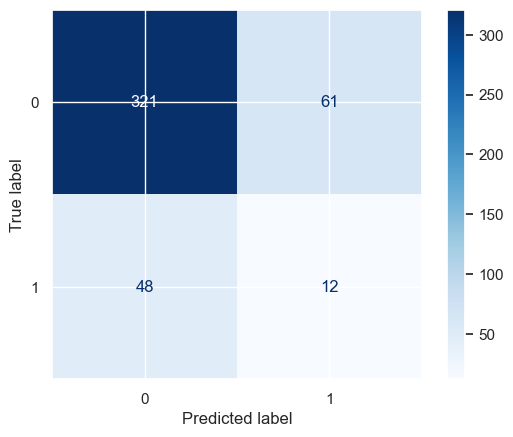

In [452]:
model1 = model_to_use("DT")
model1.fit(X_ros, y_ros)
performance(model1,X_ros,y_ros,X_test, y_test)

c:\Users\toyin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy Score : 
  0.5203619909502263

 AUC Score : 
 0.4661867364746946

 Confusion Matrix : 
  [[207 175]
 [ 37  23]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.54      0.66       382
           1       0.12      0.38      0.18        60

    accuracy                           0.52       442
   macro avg       0.48      0.46      0.42       442
weighted avg       0.75      0.52      0.60       442


 ROC curve : 



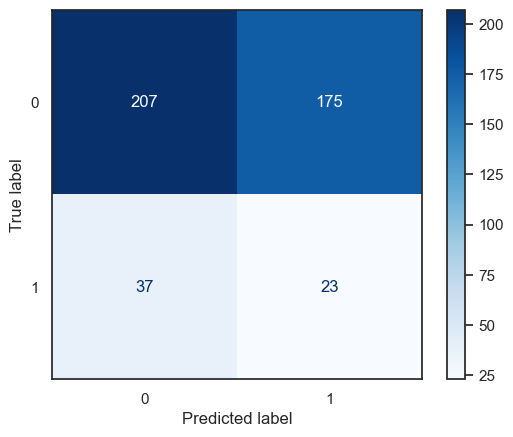

In [453]:
model2 = model_to_use("LR")
model2.fit(X_ros, y_ros)
performance(model2,X_ros,y_ros,X_test, y_test)


 Accuracy Score : 
  0.8597285067873304

 AUC Score : 
 0.6069153577661431

 Confusion Matrix : 
  [[377   5]
 [ 57   3]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       382
           1       0.38      0.05      0.09        60

    accuracy                           0.86       442
   macro avg       0.62      0.52      0.51       442
weighted avg       0.80      0.86      0.81       442


 ROC curve : 



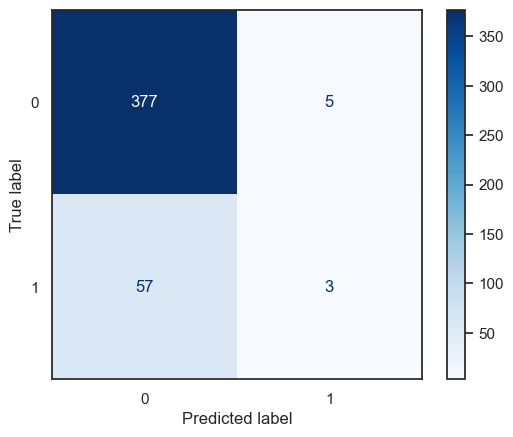

In [454]:
model3 = model_to_use("RF")
model3.fit(X_ros, y_ros)
performance(model3,X_ros,y_ros,X_test, y_test)


 Accuracy Score : 
  0.8371040723981901

 AUC Score : 
 0.6171029668411868

 Confusion Matrix : 
  [[363  19]
 [ 53   7]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       382
           1       0.27      0.12      0.16        60

    accuracy                           0.84       442
   macro avg       0.57      0.53      0.54       442
weighted avg       0.79      0.84      0.81       442


 ROC curve : 



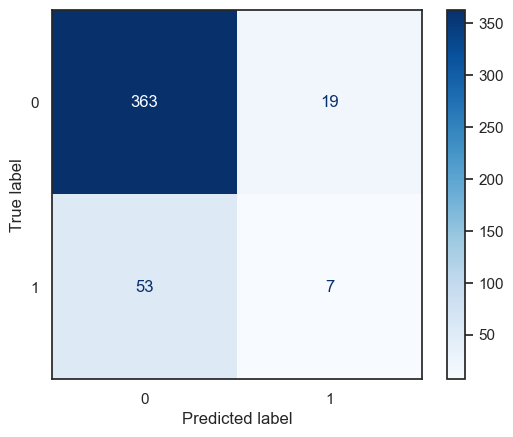

In [455]:
model4 = model_to_use("XGBC")
model4.fit(X_ros, y_ros)
performance(model4,X_ros,y_ros,X_test, y_test)


 Accuracy Score : 
  0.5475113122171946

 AUC Score : 
 0.5402923211169285

 Confusion Matrix : 
  [[215 167]
 [ 33  27]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.56      0.68       382
           1       0.14      0.45      0.21        60

    accuracy                           0.55       442
   macro avg       0.50      0.51      0.45       442
weighted avg       0.77      0.55      0.62       442


 ROC curve : 



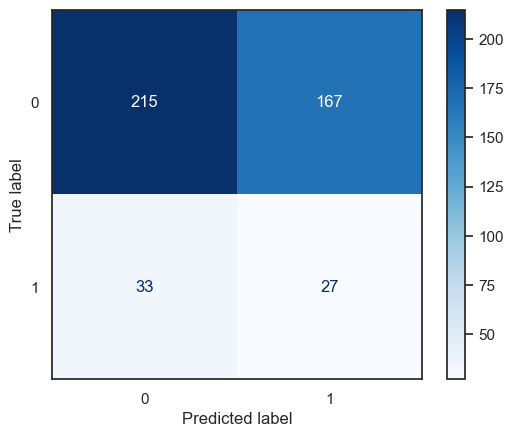

In [456]:
model5 = model_to_use("KNN")
model5.fit(X_ros, y_ros)
performance(model5,X_ros,y_ros,X_test, y_test)

In [457]:
new_data2 = df.drop(['Response'],axis=1)
new_data2.to_csv("new_data2.csv", index=False)